# CNN with Embeddings

In [1]:
# standard
import pandas as pd
import numpy as np
import random
import os

# tf and keras
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
from keras import models
from keras import layers

# plots
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# load data
training_data = pd.read_json("train.json")

# isolate variables...
X_training_data = np.array(training_data.drop('requester_received_pizza', axis = 1))
print(X_training_data.shape)

# ...from labels
Y_training_data = np.array(training_data['requester_received_pizza'])
print(Y_training_data.shape)

(4040, 31)
(4040,)


In [3]:
Y_training_data[0]

False

In [4]:
X_training_data_post = training_data['request_text_edit_aware']
X_training_data_post[0]

'Hi I am in need of food for my 4 children we are a military family that has really hit hard times and we have exahusted all means of help just to be able to feed my family and make it through another night is all i ask i know our blessing is coming so whatever u can find in your heart to give is greatly appreciated'

In [5]:
# look for NaNs, do not find any
(pd.DataFrame(X_training_data_post).isna()).value_counts()

request_text_edit_aware
False                      4040
Name: count, dtype: int64

In [6]:
max_sequence_length = 25 # how much of the post to look at

vectorize_layer = tf.keras.layers.TextVectorization(
    max_tokens=None, # Maximum vocabulary size - None -> no cap
    standardize='lower_and_strip_punctuation', # Standarization to apply to text - None -> no standarization
    split="whitespace", # Values can be None (no splitting), "whitespace", or a Callable
    output_mode='int',  # Values can be "int", "multi_hot", "count" or "tf_idf"
    output_sequence_length=max_sequence_length, # Only valid in INT mode. If set, the output will have its time dimension padded or truncated to exactly output_sequence_length values
    )

vectorize_layer.adapt(X_training_data_post)

display("--Vocabulary--")
for i, token in enumerate(vectorize_layer.get_vocabulary()):
  display('%d: %s' %(i, token))

'--Vocabulary--'

'0: '

'1: [UNK]'

'2: i'

'3: and'

'4: a'

'5: to'

'6: the'

'7: my'

'8: of'

'9: for'

'10: in'

'11: pizza'

'12: have'

'13: it'

'14: me'

'15: would'

'16: is'

'17: im'

'18: but'

'19: be'

'20: this'

'21: on'

'22: so'

'23: that'

'24: out'

'25: you'

'26: if'

'27: we'

'28: with'

'29: just'

'30: get'

'31: been'

'32: help'

'33: some'

'34: can'

'35: not'

'36: really'

'37: at'

'38: as'

'39: are'

'40: all'

'41: food'

'42: will'

'43: am'

'44: was'

'45: money'

'46: dont'

'47: now'

'48: up'

'49: from'

'50: no'

'51: or'

'52: had'

'53: ive'

'54: pay'

'55: our'

'56: like'

'57: could'

'58: thanks'

'59: week'

'60: work'

'61: job'

'62: here'

'63: any'

'64: its'

'65: until'

'66: time'

'67: last'

'68: about'

'69: do'

'70: has'

'71: love'

'72: one'

'73: when'

'74: someone'

'75: much'

'76: got'

'77: an'

'78: day'

'79: back'

'80: us'

'81: her'

'82: there'

'83: anyone'

'84: he'

'85: know'

'86: make'

'87: paid'

'88: broke'

'89: forward'

'90: right'

'91: because'

'92: today'

'93: days'

'94: go'

'95: want'

'96: she'

'97: were'

'98: they'

'99: going'

'100: only'

'101: id'

'102: next'

'103: eat'

'104: ill'

'105: new'

'106: tonight'

'107: off'

'108: few'

'109: anything'

'110: need'

'111: more'

'112: hungry'

'113: something'

'114: two'

'115: even'

'116: thank'

'117: little'

'118: who'

'119: since'

'120: cant'

'121: first'

'122: home'

'123: after'

'124: what'

'125: please'

'126: give'

'127: also'

'128: by'

'129: very'

'130: well'

'131: month'

'132: tomorrow'

'133: them'

'134: night'

'135: account'

'136: live'

'137: weeks'

'138: while'

'139: over'

'140: able'

'141: family'

'142: his'

'143: pretty'

'144: house'

'145: 2'

'146: good'

'147: before'

'148: kind'

'149: way'

'150: than'

'151: college'

'152: left'

'153: reddit'

'154: enough'

'155: appreciate'

'156: which'

'157: people'

'158: long'

'159: through'

'160: havent'

'161: him'

'162: year'

'163: friday'

'164: buy'

'165: getting'

'166: how'

'167: down'

'168: then'

'169: ramen'

'170: months'

'171: hey'

'172: edit'

'173: being'

'174: sure'

'175: other'

'176: rent'

'177: use'

'178: student'

'179: story'

'180: myself'

'181: nothing'

'182: your'

'183: car'

'184: into'

'185: willing'

'186: dinner'

'187: 3'

'188: ago'

'189: looking'

'190: couple'

'191: bank'

'192: appreciated'

'193: guys'

'194: things'

'195: feel'

'196: bills'

'197: still'

'198: send'

'199: return'

'200: nice'

'201: friends'

'202: working'

'203: having'

'204: friend'

'205: wont'

'206: too'

'207: living'

'208: bit'

'209: old'

'210: take'

'211: great'

'212: due'

'213: trying'

'214: school'

'215: past'

'216: find'

'217: recently'

'218: eating'

'219: come'

'220: paycheck'

'221: think'

'222: didnt'

'223: try'

'224: never'

'225: post'

'226: away'

'227: soon'

'228: awesome'

'229: lost'

'230: cash'

'231: another'

'232: again'

'233: life'

'234: card'

'235: both'

'236: reading'

'237: place'

'238: check'

'239: lot'

'240: once'

'241: moved'

'242: their'

'243: currently'

'244: ask'

'245: see'

'246: hours'

'247: kids'

'248: bad'

'249: around'

'250: where'

'251: else'

'252: afford'

'253: happy'

'254: hard'

'255: favor'

'256: thought'

'257: years'

'258: request'

'259: raop'

'260: doesnt'

'261: mom'

'262: thats'

'263: hope'

'264: thing'

'265: hoping'

'266: keep'

'267: meal'

'268: hi'

'269: asking'

'270: random'

'271: found'

'272: wife'

'273: doing'

'274: put'

'275: better'

'276: went'

'277: spent'

'278: say'

'279: best'

'280: most'

'281: made'

'282: subreddit'

'283: apartment'

'284: everything'

'285: let'

'286: order'

'287: girlfriend'

'288: without'

'289: weekend'

'290: provide'

'291: theres'

'292: parents'

'293: greatly'

'294: gas'

'295: end'

'296: free'

'297: 4'

'298: weve'

'299: advance'

'300: though'

'301: offer'

'302: jobs'

'303: everyone'

'304: dominos'

'305: short'

'306: grateful'

'307: yesterday'

'308: starving'

'309: did'

'310: situation'

'311: coming'

'312: title'

'313: three'

'314: said'

'315: paying'

'316: husband'

'317: actually'

'318: monday'

'319: fridge'

'320: 5'

'321: rice'

'322: start'

'323: hes'

'324: isnt'

'325: told'

'326: feeling'

'327: stuff'

'328: hello'

'329: every'

'330: birthday'

'331: says'

'332: redditor'

'333: promise'

'334: hut'

'335: hot'

'336: finally'

'337: verification'

'338: maybe'

'339: area'

'340: cheese'

'341: sob'

'342: should'

'343: amazing'

'344: name'

'345: making'

'346: proof'

'347: till'

'348: real'

'349: pie'

'350: moment'

'351: feed'

'352: small'

'353: mother'

'354: done'

'355: craving'

'356: ever'

'357: yet'

'358: started'

'359: morning'

'360: least'

'361: either'

'362: definitely'

'363: works'

'364: unfortunately'

'365: sick'

'366: probably'

'367: picture'

'368: these'

'369: own'

'370: full'

'371: anyway'

'372: times'

'373: gift'

'374: eaten'

'375: care'

'376: always'

'377: person'

'378: guy'

'379: empty'

'380: taking'

'381: poor'

'382: might'

'383: may'

'384: completely'

'385: thursday'

'386: half'

'387: funds'

'388: payday'

'389: move'

'390: came'

'391: those'

'392: point'

'393: already'

'394: roommate'

'395: pm'

'396: papa'

'397: almost'

'398: used'

'399: took'

'400: lunch'

'401: johns'

'402: boyfriend'

'403: town'

'404: summer'

'405: low'

'406: decided'

'407: rough'

'408: whatever'

'409: such'

'410: far'

'411: big'

'412: shes'

'413: basically'

'414: youre'

'415: stay'

'416: noodles'

'417: moving'

'418: leave'

'419: wanted'

'420: unemployed'

'421: gets'

'422: between'

'423: son'

'424: many'

'425: luck'

'426: together'

'427: late'

'428: gone'

'429: delicious'

'430: alone'

'431: waiting'

'432: tuesday'

'433: part'

'434: however'

'435: enjoy'

'436: comes'

'437: brother'

'438: surprise'

'439: spend'

'440: room'

'441: groceries'

'442: tell'

'443: needed'

'444: financial'

'445: dollars'

'446: d'

'447: ran'

'448: phone'

'449: mind'

'450: 6'

'451: tight'

'452: helping'

'453: dad'

'454: sorry'

'455: code'

'456: top'

'457: sister'

'458: run'

'459: quite'

'460: local'

'461: couldnt'

'462: 10'

'463: whole'

'464: lately'

'465: hopefully'

'466: heres'

'467: means'

'468: generous'

'469: break'

'470: 1'

'471: stuck'

'472: struggling'

'473: read'

'474: course'

'475: celebrate'

'476: later'

'477: bill'

'478: why'

'479: state'

'480: rest'

'481: look'

'482: less'

'483: wouldnt'

'484: gladly'

'485: feet'

'486: bread'

'487: 20'

'488: usually'

'489: same'

'490: figured'

'491: cook'

'492: shot'

'493: hour'

'494: girl'

'495: sitting'

'496: redditors'

'497: pick'

'498: mean'

'499: idea'

'500: draw'

'501: studying'

'502: treat'

'503: site'

'504: share'

'505: plan'

'506: location'

'507: itd'

'508: sounds'

'509: show'

'510: literally'

'511: tried'

'512: starting'

'513: stamps'

'514: reason'

'515: makes'

'516: laid'

'517: hospital'

'518: hit'

'519: forgot'

'520: extra'

'521: evening'

'522: daughter'

'523: barely'

'524: absolutely'

'525: sad'

'526: running'

'527: near'

'528: internet'

'529: heart'

'530: dog'

'531: world'

'532: wants'

'533: save'

'534: roommates'

'535: man'

'536: cheer'

'537: repay'

'538: hate'

'539: close'

'540: children'

'541: high'

'542: giving'

'543: credit'

'544: company'

'545: amp'

'546: worth'

'547: wondering'

'548: pantry'

'549: kindness'

'550: university'

'551: rather'

'552: wednesday'

'553: turn'

'554: students'

'555: single'

'556: pizzas'

'557: large'

'558: income'

'559: heard'

'560: goes'

'561: future'

'562: forever'

'563: does'

'564: wait'

'565: tired'

'566: super'

'567: finals'

'568: call'

'569: ate'

'570: act'

'571: wonderful'

'572: pepperoni'

'573: finished'

'574: write'

'575: except'

'576: bought'

'577: worked'

'578: store'

'579: posting'

'580: pictures'

'581: oh'

'582: loan'

'583: hell'

'584: grocery'

'585: god'

'586: cool'

'587: change'

'588: baby'

'589: arent'

'590: water'

'591: possible'

'592: cooking'

'593: community'

'594: cat'

'595: budget'

'596: stomach'

'597: pass'

'598: kinda'

'599: head'

'600: fun'

'601: fine'

'602: asked'

'603: unemployment'

'604: totally'

'605: online'

'606: guess'

'607: etc'

'608: drive'

'609: cannot'

'610: wasnt'

'611: staying'

'612: needs'

'613: game'

'614: extremely'

'615: wallet'

'616: tough'

'617: throwaway'

'618: spare'

'619: posted'

'620: lt3'

'621: gonna'

'622: several'

'623: semester'

'624: saturday'

'625: pasta'

'626: insurance'

'627: hasnt'

'628: happen'

'629: fellow'

'630: fact'

'631: called'

'632: bucks'

'633: 12'

'634: yeah'

'635: sunday'

'636: others'

'637: instead'

'638: honestly'

'639: different'

'640: deal'

'641: cheesy'

'642: anyways'

'643: 7'

'644: seems'

'645: mine'

'646: ended'

'647: classes'

'648: anymore'

'649: within'

'650: terrible'

'651: taken'

'652: receive'

'653: power'

'654: located'

'655: hold'

'656: figure'

'657: during'

'658: bed'

'659: 30'

'660: youd'

'661: wed'

'662: til'

'663: shit'

'664: places'

'665: open'

'666: hand'

'667: four'

'668: city'

'669: beans'

'670: supposed'

'671: spending'

'672: special'

'673: gotten'

'674: gave'

'675: deposit'

'676: decent'

'677: bless'

'678: wanna'

'679: support'

'680: simple'

'681: normally'

'682: major'

'683: longer'

'684: delivery'

'685: cut'

'686: closed'

'687: christmas'

'688: chicken'

'689: video'

'690: trade'

'691: soul'

'692: shitty'

'693: second'

'694: problem'

'695: paypal'

'696: meals'

'697: happened'

'698: exactly'

'699: crazy'

'700: cold'

'701: chance'

'702: california'

'703: wrong'

'704: wish'

'705: using'

'706: sent'

'707: okay'

'708: helps'

'709: computer'

'710: class'

'711: butter'

'712: acts'

'713: walk'

'714: turned'

'715: position'

'716: outside'

'717: leaving'

'718: honest'

'719: helped'

'720: exchange'

'721: each'

'722: cover'

'723: surgery'

'724: spot'

'725: spirits'

'726: problems'

'727: party'

'728: mention'

'729: lurker'

'730: hook'

'731: canada'

'732: assistance'

'733: amount'

'734: watching'

'735: warm'

'736: understand'

'737: received'

'738: florida'

'739: face'

'740: especially'

'741: email'

'742: buying'

'743: boss'

'744: believe'

'745: 8'

'746: towards'

'747: seeing'

'748: putting'

'749: pregnant'

'750: payment'

'751: pain'

'752: gf'

'753: cheap'

'754: cards'

'755: aid'

'756: 15'

'757: visit'

'758: tldr'

'759: theyre'

'760: system'

'761: stress'

'762: stop'

'763: sort'

'764: smile'

'765: sleep'

'766: miss'

'767: lol'

'768: loans'

'769: lives'

'770: huge'

'771: homeless'

'772: favorite'

'773: business'

'774: behind'

'775: along'

'776: upon'

'777: thinking'

'778: shopping'

'779: requesting'

'780: office'

'781: meat'

'782: info'

'783: goodness'

'784: father'

'785: debit'

'786: bus'

'787: bunch'

'788: uk'

'789: type'

'790: slice'

'791: saving'

'792: ps'

'793: meet'

'794: issues'

'795: given'

'796: financially'

'797: details'

'798: depressed'

'799: checking'

'800: bring'

'801: anybody'

'802: watch'

'803: song'

'804: prove'

'805: possibly'

'806: movie'

'807: interview'

'808: dollar'

'809: desperate'

'810: worse'

'811: test'

'812: talk'

'813: sub'

'814: message'

'815: kid'

'816: entire'

'817: early'

'818: difficult'

'819: debt'

'820: considering'

'821: case'

'822: 100'

'823: website'

'824: walking'

'825: texas'

'826: soup'

'827: plus'

'828: news'

'829: managed'

'830: link'

'831: information'

'832: expenses'

'833: donate'

'834: date'

'835: cereal'

'836: cause'

'837: campus'

'838: bag'

'839: art'

'840: young'

'841: yes'

'842: whats'

'843: wanting'

'844: under'

'845: somebody'

'846: sauce'

'847: questions'

'848: process'

'849: playing'

'850: passed'

'851: ok'

'852: nights'

'853: mostly'

'854: milk'

'855: medical'

'856: interested'

'857: games'

'858: cents'

'859: ca'

'860: unable'

'861: side'

'862: ohio'

'863: frozen'

'864: folks'

'865: fix'

'866: finding'

'867: final'

'868: august'

'869: turns'

'870: starts'

'871: shift'

'872: seriously'

'873: missed'

'874: mail'

'875: favour'

'876: easy'

'877: dry'

'878: door'

'879: consideration'

'880: canned'

'881: address'

'882: tasty'

'883: sucks'

'884: set'

'885: saw'

'886: remember'

'887: realized'

'888: play'

'889: pics'

'890: peanut'

'891: offers'

'892: minutes'

'893: minimum'

'894: flat'

'895: fill'

'896: felt'

'897: feels'

'898: ends'

'899: eggs'

'900: earlier'

'901: driving'

'902: dogs'

'903: current'

'904: cost'

'905: brighten'

'906: across'

'907: 9'

'908: trip'

'909: throw'

'910: study'

'911: seen'

'912: seem'

'913: requested'

'914: project'

'915: nearly'

'916: miles'

'917: losing'

'918: kitchen'

'919: front'

'920: deliver'

'921: boys'

'922: anywhere'

'923: utilities'

'924: shop'

'925: savings'

'926: saved'

'927: sadly'

'928: quit'

'929: pic'

'930: p'

'931: otherwise'

'932: mood'

'933: matter'

'934: leftovers'

'935: knew'

'936: kicked'

'937: glad'

'938: fixed'

'939: degree'

'940: comfort'

'941: box'

'942: awhile'

'943: ass'

'944: afternoon'

'945: writing'

'946: wage'

'947: street'

'948: stranger'

'949: saying'

'950: ready'

'951: paychecks'

'952: ones'

'953: oatmeal'

'954: lack'

'955: hurt'

'956: happily'

'957: form'

'958: fired'

'959: enjoying'

'960: crust'

'961: choice'

'962: busy'

'963: breakfast'

'964: add'

'965: accident'

'966: worry'

'967: via'

'968: unexpected'

'969: stupid'

'970: stolen'

'971: sometimes'

'972: sometime'

'973: simply'

'974: service'

'975: sell'

'976: sandwiches'

'977: requests'

'978: realize'

'979: option'

'980: obviously'

'981: lucky'

'982: light'

'983: lift'

'984: gives'

'985: fast'

'986: depression'

'987: broken'

'988: 25'

'989: 23'

'990: whether'

'991: training'

'992: thanksgiving'

'993: talking'

'994: stressed'

'995: stories'

'996: sending'

'997: ride'

'998: recent'

'999: payments'

'1000: paper'

'1001: page'

'1002: options'

'1003: note'

'1004: north'

'1005: lady'

'1006: itll'

'1007: hunger'

'1008: holiday'

'1009: happens'

'1010: generosity'

'1011: general'

'1012: fees'

'1013: fall'

'1014: dominoes'

'1015: diet'

'1016: cleaning'

'1017: checks'

'1018: brought'

'1019: available'

'1020: applied'

'1021: 24'

'1022: verify'

'1023: true'

'1024: telling'

'1025: takes'

'1026: somehow'

'1027: reasons'

'1028: prefer'

'1029: planning'

'1030: payed'

'1031: number'

'1032: none'

'1033: negative'

'1034: must'

'1035: mac'

'1036: luckily'

'1037: loves'

'1038: lovely'

'1039: girls'

'1040: fiance'

'1041: exams'

'1042: couch'

'1043: chicago'

'1044: certainly'

'1045: 40'

'1046: worst'

'1047: woke'

'1048: trouble'

'1049: sweet'

'1050: survive'

'1051: strangers'

'1052: stopped'

'1053: shut'

'1054: serious'

'1055: sandwich'

'1056: personal'

'1057: music'

'1058: main'

'1059: lots'

'1060: lose'

'1061: lets'

'1062: landlord'

'1063: including'

'1064: health'

'1065: graduated'

'1066: fantastic'

'1067: eternally'

'1068: energy'

'1069: dream'

'1070: dealing'

'1071: costs'

'1072: child'

'1073: cats'

'1074: benefits'

'1075: bar'

'1076: applying'

'1077: 1st'

'1078: tuna'

'1079: tank'

'1080: straight'

'1081: starve'

'1082: purchase'

'1083: posts'

'1084: picky'

'1085: owe'

'1086: nearby'

'1087: n'

'1088: limited'

'1089: keeping'

'1090: june'

'1091: incredibly'

'1092: heat'

'1093: haha'

'1094: finish'

'1095: faith'

'1096: expensive'

'1097: died'

'1098: damn'

'1099: crappy'

'1100: appreciative'

'1101: apparently'

'1102: ahead'

'1103: ages'

'1104: access'

'1105: word'

'1106: vet'

'1107: tv'

'1108: total'

'1109: theyve'

'1110: supplies'

'1111: stretch'

'1112: sit'

'1113: restaurant'

'1114: receiving'

'1115: planned'

'1116: ny'

'1117: necessary'

'1118: middle'

'1119: meaning'

'1120: listening'

'1121: july'

'1122: fucking'

'1123: foot'

'1124: five'

'1125: exhausted'

'1126: deserve'

'1127: cutting'

'1128: country'

'1129: cheers'

'1130: cancer'

'1131: besides'

'1132: beautiful'

'1133: bare'

'1134: awful'

'1135: aside'

'1136: artist'

'1137: above'

'1138: 15th'

'1139: whos'

'1140: uni'

'1141: tip'

'1142: taste'

'1143: security'

'1144: regardless'

'1145: potatoes'

'1146: piece'

'1147: ontario'

'1148: offered'

'1149: needless'

'1150: michigan'

'1151: looks'

'1152: lie'

'1153: knows'

'1154: kick'

'1155: history'

'1156: hang'

'1157: fault'

'1158: expecting'

'1159: ex'

'1160: embarrassed'

'1161: cute'

'1162: central'

'1163: beginning'

'1164: begging'

'1165: balance'

'1166: bacon'

'1167: answer'

'1168: 22'

'1169: 200'

'1170: truly'

'1171: suppose'

'1172: stressful'

'1173: south'

'1174: six'

'1175: self'

'1176: seattle'

'1177: screwed'

'1178: relationship'

'1179: pride'

'1180: plenty'

'1181: pays'

'1182: partner'

'1183: pack'

'1184: ordering'

'1185: odd'

'1186: notice'

'1187: met'

'1188: meantime'

'1189: meant'

'1190: january'

'1191: interviews'

'1192: hear'

'1193: graduate'

'1194: freezer'

'1195: fell'

'1196: fed'

'1197: experience'

'1198: er'

'1199: electricity'

'1200: dorm'

'1201: doctor'

'1202: dire'

'1203: desperately'

'1204: design'

'1205: delivered'

'1206: cupboards'

'1207: although'

'1208: 50'

'1209: 18'

'1210: youve'

'1211: washington'

'1212: visiting'

'1213: usual'

'1214: usa'

'1215: truck'

'1216: thread'

'1217: thankfully'

'1218: term'

'1219: step'

'1220: steam'

'1221: somewhere'

'1222: sisters'

'1223: rrandomactsofpizza'

'1224: roap'

'1225: red'

'1226: program'

'1227: poster'

'1228: plain'

'1229: peace'

'1230: older'

'1231: often'

'1232: member'

'1233: leaves'

'1234: knowing'

'1235: kept'

'1236: hotel'

'1237: holidays'

'1238: hanging'

'1239: group'

'1240: gratitude'

'1241: fairly'

'1242: facebook'

'1243: excited'

'1244: employment'

'1245: egift'

'1246: economy'

'1247: drunk'

'1248: dropped'

'1249: driver'

'1250: drinking'

'1251: drawing'

'1252: drained'

'1253: doctors'

'1254: distance'

'1255: disabled'

'1256: disability'

'1257: direct'

'1258: delivers'

'1259: death'

'1260: crying'

'1261: coupon'

'1262: contract'

'1263: complete'

'1264: cell'

'1265: btw'

'1266: books'

'1267: begin'

'1268: become'

'1269: atm'

'1270: asap'

'1271: anniversary'

'1272: alot'

'1273: accounts'

'1274: 21'

'1275: yay'

'1276: weight'

'1277: update'

'1278: twice'

'1279: tuition'

'1280: tiny'

'1281: thankful'

'1282: tests'

'1283: supply'

'1284: strapped'

'1285: sleeping'

'1286: sign'

'1287: shelter'

'1288: rock'

'1289: reward'

'1290: regular'

'1291: pbampj'

'1292: oregon'

'1293: opportunity'

'1294: normal'

'1295: monthly'

'1296: lonely'

'1297: involved'

'1298: important'

'1299: immediately'

'1300: greasy'

'1301: grad'

'1302: gluten'

'1303: forget'

'1304: filling'

'1305: fiancee'

'1306: drink'

'1307: crap'

'1308: clean'

'1309: cans'

'1310: brothers'

'1311: boy'

'1312: bored'

'1313: based'

'1314: 4th'

'1315: 16'

'1316: yup'

'1317: yall'

'1318: uncle'

'1319: turning'

'1320: ton'

'1321: tips'

'1322: ticket'

'1323: thatd'

'1324: surviving'

'1325: suggested'

'1326: station'

'1327: spring'

'1328: speak'

'1329: spaghetti'

'1330: slow'

'1331: slices'

'1332: size'

'1333: siblings'

'1334: selling'

'1335: screen'

'1336: scraping'

'1337: road'

'1338: retail'

'1339: quickly'

'1340: previous'

'1341: pizzad'

'1342: pity'

'1343: perfect'

'1344: paint'

'1345: moms'

'1346: missing'

'1347: married'

'1348: manage'

'1349: list'

'1350: letting'

'1351: inside'

'1352: include'

'1353: hurts'

'1354: humanity'

'1355: horrible'

'1356: homework'

'1357: himself'

'1358: funny'

'1359: fuck'

'1360: freelance'

'1361: fan'

'1362: easier'

'1363: dining'

'1364: die'

'1365: despite'

'1366: decide'

'1367: cup'

'1368: counting'

'1369: circumstances'

'1370: charity'

'1371: chain'

'1372: calling'

'1373: building'

'1374: buddy'

'1375: breaking'

'1376: book'

'1377: black'

'1378: belly'

'1379: allow'

'1380: 19'

'1381: 11'

'1382: zero'

'1383: york'

'1384: ya'

'1385: wa'

'1386: virginia'

'1387: username'

'1388: unless'

'1389: u'

'1390: tummy'

'1391: throwing'

'1392: stand'

'1393: southern'

'1394: sound'

'1395: sold'

'1396: shall'

'1397: searching'

'1398: san'

'1399: roof'

'1400: required'

'1401: related'

'1402: positive'

'1403: portland'

'1404: pocket'

'1405: plans'

'1406: per'

'1407: overdraft'

'1408: offering'

'1409: nyc'

'1410: nor'

'1411: neither'

'1412: mothers'

'1413: military'

'1414: midnight'

'1415: medium'

'1416: looked'

'1417: library'

'1418: lend'

'1419: learned'

'1420: karma'

'1421: imagine'

'1422: helpful'

'1423: hadnt'

'1424: graphic'

'1425: grand'

'1426: grab'

'1427: georgia'

'1428: funeral'

'1429: fresh'

'1430: feeding'

'1431: fallen'

'1432: exam'

'1433: entirely'

'1434: double'

'1435: crackers'

'1436: constantly'

'1437: coffee'

'1438: clear'

'1439: center'

'1440: cars'

'1441: brain'

'1442: bowl'

'1443: bottom'

'1444: beg'

'1445: basic'

'1446: appetite'

'1447: 3rd'

'1448: 2nd'

'1449: za'

'1450: younger'

'1451: worried'

'1452: words'

'1453: wise'

'1454: whoever'

'1455: weird'

'1456: wedding'

'1457: uh'

'1458: toast'

'1459: tells'

'1460: tax'

'1461: surely'

'1462: steady'

'1463: st'

'1464: soda'

'1465: season'

'1466: relax'

'1467: refund'

'1468: proper'

'1469: photos'

'1470: perhaps'

'1471: particularly'

'1472: overdrawn'

'1473: ourselves'

'1474: ordered'

'1475: october'

'1476: ms'

'1477: minute'

'1478: medication'

'1479: matters'

'1480: lurking'

'1481: line'

'1482: likely'

'1483: license'

'1484: joke'

'1485: injury'

'1486: hopes'

'1487: hero'

'1488: government'

'1489: gotta'

'1490: foods'

'1491: explain'

'1492: everyones'

'1493: digital'

'1494: difference'

'1495: deserving'

'1496: degrees'

'1497: coworkers'

'1498: continue'

'1499: consider'

'1500: chocolate'

'1501: charge'

'1502: caught'

'1503: carolina'

'1504: borrow'

'1505: blessing'

'1506: bike'

'1507: beyond'

'1508: april'

'1509: alright'

'1510: age'

'1511: actual'

'1512: worker'

'1513: vegan'

'1514: various'

'1515: vacation'

'1516: tx'

'1517: transportation'

'1518: tons'

'1519: tn'

'1520: temp'

'1521: team'

'1522: stuffed'

'1523: strong'

'1524: stable'

'1525: sidebar'

'1526: shed'

'1527: severe'

'1528: returned'

'1529: replace'

'1530: repair'

'1531: remembered'

'1532: quick'

'1533: puppy'

'1534: provided'

'1535: present'

'1536: pounds'

'1537: pop'

'1538: photoshop'

'1539: packing'

'1540: pa'

'1541: nowhere'

'1542: nobody'

'1543: multiple'

'1544: male'

'1545: lived'

'1546: lazy'

'1547: kill'

'1548: jobless'

'1549: items'

'1550: intend'

'1551: hearing'

'1552: heading'

'1553: guilty'

'1554: grant'

'1555: grandmother'

'1556: girlfriends'

'1557: further'

'1558: fulfill'

'1559: fuel'

'1560: fucked'

'1561: forced'

'1562: foodstamps'

'1563: floor'

'1564: fee'

'1565: expect'

'1566: everybody'

'1567: essentially'

'1568: employed'

'1569: eastern'

'1570: east'

'1571: disease'

'1572: dig'

'1573: diagnosed'

'1574: deep'

'1575: dead'

'1576: cupboard'

'1577: choose'

'1578: chips'

'1579: career'

'1580: cancelled'

'1581: boxes'

'1582: bottle'

'1583: boost'

'1584: blue'

'1585: below'

'1586: austin'

'1587: atlanta'

'1588: anyones'

'1589: allowed'

'1590: alive'

'1591: accept'

'1592: 500'

'1593: 30th'

'1594: 17'

'1595: yummy'

'1596: wow'

'1597: wishes'

'1598: west'

'1599: welcome'

'1600: veggies'

'1601: upset'

'1602: transfer'

'1603: toward'

'1604: toppings'

'1605: tide'

'1606: tickets'

'1607: ten'

'1608: table'

'1609: states'

'1610: source'

'1611: social'

'1612: skills'

'1613: signed'

'1614: scared'

'1615: round'

'1616: returning'

'1617: result'

'1618: removed'

'1619: record'

'1620: randomly'

'1621: quality'

'1622: points'

'1623: poem'

'1624: picked'

'1625: personally'

'1626: patch'

'1627: parttime'

'1628: original'

'1629: o'

'1630: needy'

'1631: mum'

'1632: morale'

'1633: moneys'

'1634: messed'

'1635: meeting'

'1636: march'

'1637: loved'

'1638: lease'

'1639: law'

'1640: labor'

'1641: known'

'1642: keys'

'1643: item'

'1644: instant'

'1645: ideas'

'1646: huh'

'1647: household'

'1648: holding'

'1649: hired'

'1650: healthy'

'1651: hardly'

'1652: hall'

'1653: grandma'

'1654: gifts'

'1655: fully'

'1656: fixing'

'1657: fight'

'1658: fever'

'1659: february'

'1660: evicted'

'1661: everyday'

'1662: english'

'1663: engineering'

'1664: emergency'

'1665: electric'

'1666: easily'

'1667: drop'

'1668: depressing'

'1669: decision'

'1670: december'

'1671: daughters'

'1672: dark'

'1673: dads'

'1674: cry'

'1675: county'

'1676: copy'

'1677: closer'

'1678: changed'

'1679: caused'

'1680: catch'

'1681: calls'

'1682: cake'

'1683: cafeteria'

'1684: boyfriends'

'1685: body'

'1686: bear'

'1687: beach'

'1688: az'

'1689: average'

'1690: apt'

'1691: application'

'1692: apart'

'1693: ankle'

'1694: alas'

'1695: air'

'1696: against'

'1697: adults'

'1698: ac'

'1699: 90'

'1700: 5th'

'1701: 45'

'1702: 300'

'1703: 14'

'1704: yr'

'1705: youll'

'1706: worries'

'1707: white'

'1708: wall'

'1709: w'

'1710: va'

'1711: understanding'

'1712: track'

'1713: touch'

'1714: toronto'

'1715: tire'

'1716: theyll'

'1717: swear'

'1718: suffering'

'1719: suffer'

'1720: struggle'

'1721: stayed'

'1722: specifically'

'1723: someones'

'1724: slightly'

'1725: sing'

'1726: silly'

'1727: showed'

'1728: shifts'

'1729: services'

'1730: senior'

'1731: science'

'1732: sausage'

'1733: row'

'1734: response'

'1735: refrigerator'

'1736: reciprocate'

'1737: reach'

'1738: rain'

'1739: pull'

'1740: proud'

'1741: projects'

'1742: prior'

'1743: photo'

'1744: period'

'1745: penny'

'1746: pathetic'

'1747: parking'

'1748: oven'

'1749: opened'

'1750: onto'

'1751: noticed'

'1752: nc'

'1753: munch'

'1754: mental'

'1755: members'

'1756: medicine'

'1757: luxury'

'1758: loving'

'1759: lovers'

'1760: lawyer'

'1761: killing'

'1762: kidney'

'1763: join'

'1764: jelly'

'1765: issue'

'1766: internship'

'1767: indiana'

'1768: improve'

'1769: il'

'1770: idiot'

'1771: hunting'

'1772: halfway'

'1773: grade'

'1774: ga'

'1775: flu'

'1776: finances'

'1777: fear'

'1778: eye'

'1779: engine'

'1780: employer'

'1781: education'

'1782: dude'

'1783: divorce'

'1784: deleted'

'1785: delayed'

'1786: dear'

'1787: dc'

'1788: corn'

'1789: colorado'

'1790: closest'

'1791: church'

'1792: checked'

'1793: c'

'1794: bummed'

'1795: boston'

'1796: bonus'

'1797: beer'

'1798: beat'

'1799: bday'

'1800: bc'

'1801: band'

'1802: background'

'1803: avail'

'1804: asleep'

'1805: arrive'

'1806: army'

'1807: america'

'1808: amazon'

'1809: 6th'

'1810: 13'

'1811: 10th'

'1812: yo'

'1813: xbox'

'1814: woman'

'1815: whenever'

'1816: werent'

'1817: ways'

'1818: walked'

'1819: vehicle'

'1820: vegetables'

'1821: user'

'1822: train'

'1823: thus'

'1824: thru'

'1825: terms'

'1826: surprised'

'1827: suck'

'1828: subsisting'

'1829: stick'

'1830: stated'

'1831: space'

'1832: somewhat'

'1833: solid'

'1834: slowly'

'1835: slept'

'1836: similar'

'1837: sees'

'1838: scarce'

'1839: safe'

'1840: respond'

'1841: reply'

'1842: relief'

'1843: raining'

'1844: question'

'1845: public'

'1846: providing'

'1847: private'

'1848: preferably'

'1849: pockets'

'1850: pies'

'1851: philly'

'1852: patient'

'1853: packs'

'1854: packed'

'1855: orange'

'1856: november'

'1857: northern'

'1858: nature'

'1859: monies'

'1860: mistake'

'1861: missouri'

'1862: mi'

'1863: market'

'1864: longtime'

'1865: london'

'1866: leg'

'1867: laptop'

'1868: knee'

'1869: kindly'

'1870: individual'

'1871: included'

'1872: ice'

'1873: hurricane'

'1874: hunt'

'1875: hundred'

'1876: human'

'1877: honor'

'1878: heck'

'1879: handouts'

'1880: guitar'

'1881: green'

'1882: grandparents'

'1883: graduating'

'1884: gig'

'1885: fulltime'

'1886: follow'

'1887: fire'

'1888: finance'

'1889: filled'

'1890: fighting'

'1891: fair'

'1892: expired'

'1893: eventually'

'1894: edible'

'1895: earn'

'1896: drove'

'1897: dreams'

'1898: doubt'

'1899: desk'

'1900: deserves'

'1901: cream'

'1902: corner'

'1903: conversation'

'1904: contest'

'1905: contact'

'1906: comment'

'1907: clothes'

'1908: cheapest'

'1909: celebration'

'1910: canadian'

'1911: benefit'

'1912: bedroom'

'1913: bailed'

'1914: attempt'

'1915: arkansas'

'1916: anxiety'

'1917: afraid'

'1918: advice'

'1919: ability'

'1920: 35'

'1921: yourself'

'1922: xd'

'1923: writer'

'1924: wiped'

'1925: wings'

'1926: win'

'1927: weed'

'1928: web'

'1929: weather'

'1930: walmart'

'1931: verified'

'1932: upcoming'

'1933: unfortunate'

'1934: throat'

'1935: third'

'1936: thin'

'1937: tennessee'

'1938: temporary'

'1939: teaching'

'1940: teacher'

'1941: tapped'

'1942: sum'

'1943: sucked'

'1944: style'

'1945: strange'

'1946: storm'

'1947: stock'

'1948: souls'

'1949: sons'

'1950: smoking'

'1951: situations'

'1952: sigh'

'1953: shows'

'1954: shell'

'1955: series'

'1956: september'

'1957: sends'

'1958: scrape'

'1959: schedule'

'1960: sat'

'1961: santa'

'1962: runs'

'1963: rules'

'1964: results'

'1965: resort'

'1966: repairs'

'1967: registered'

'1968: reasonable'

'1969: randomactsofpizza'

'1970: quarter'

'1971: pulling'

'1972: promised'

'1973: prepared'

'1974: pineapple'

'1975: physically'

'1976: philadelphia'

'1977: papers'

'1978: package'

'1979: oil'

'1980: nursing'

'1981: netflix'

'1982: neighbors'

'1983: mortgage'

'1984: mommy'

'1985: mix'

'1986: midterm'

'1987: media'

'1988: massive'

'1989: marathon'

'1990: managing'

'1991: ma'

'1992: learn'

'1993: land'

'1994: la'

'1995: kitty'

'1996: key'

'1997: keeps'

'1998: injured'

'1999: infection'

'2000: illness'

'2001: humbly'

'2002: humans'

'2003: hole'

'2004: hands'

'2005: hamburger'

'2006: giver'

'2007: garden'

'2008: friendly'

'2009: freaking'

'2010: fortunate'

'2011: forth'

'2012: force'

'2013: flavor'

'2014: fl'

'2015: fish'

'2016: fingers'

'2017: film'

'2018: favourite'

'2019: fat'

'2020: fancy'

'2021: failed'

'2022: expected'

'2023: exists'

'2024: exact'

'2025: est'

'2026: essay'

'2027: error'

'2028: episode'

'2029: enjoyed'

'2030: emotionally'

'2031: electronic'

'2032: egg'

'2033: ecard'

'2034: dying'

'2035: downtown'

'2036: donating'

'2037: dinners'

'2038: designer'

'2039: deposited'

'2040: department'

'2041: declined'

'2042: decides'

'2043: create'

'2044: cousin'

'2045: coupons'

'2046: count'

'2047: convince'

'2048: control'

'2049: contribute'

'2050: considered'

'2051: comments'

'2052: coast'

'2053: claim'

'2054: choosing'

'2055: chef'

'2056: cheering'

'2057: cheating'

'2058: chair'

'2059: cent'

'2060: carry'

'2061: cabinets'

'2062: buys'

'2063: build'

'2064: buffalo'

'2065: breadsticks'

'2066: born'

'2067: board'

'2068: blow'

'2069: blood'

'2070: blessed'

'2071: bite'

'2072: bitch'

'2073: bind'

'2074: bf'

'2075: became'

'2076: basement'

'2077: badly'

'2078: b'

'2079: australia'

'2080: ashamed'

'2081: arizona'

'2082: animals'

'2083: angel'

'2084: admit'

'2085: added'

'2086: active'

'2087: absolute'

'2088: 800'

'2089: 400'

'2090: 20th'

'2091: yours'

'2092: yard'

'2093: x'

'2094: won'

'2095: wifes'

'2096: whom'

'2097: waste'

'2098: wages'

'2099: vegetarian'

'2100: van'

'2101: unexpectedly'

'2102: tucson'

'2103: troubles'

'2104: tree'

'2105: tomato'

'2106: thrones'

'2107: threw'

'2108: thoughts'

'2109: thinks'

'2110: text'

'2111: tech'

'2112: taxes'

'2113: subway'

'2114: studio'

'2115: stressing'

'2116: stone'

'2117: sober'

'2118: smoke'

'2119: skype'

'2120: sketch'

'2121: sides'

'2122: shock'

'2123: shape'

'2124: seemed'

'2125: scrap'

'2126: saint'

'2127: resume'

'2128: responsible'

'2129: replacement'

'2130: rental'

'2131: rely'

'2132: reads'

'2133: rambling'

'2134: raise'

'2135: pulled'

'2136: processing'

'2137: procedure'

'2138: preparing'

'2139: popcorn'

'2140: played'

'2141: plasma'

'2142: pile'

'2143: pieces'

'2144: pennies'

'2145: participate'

'2146: owner'

'2147: overnight'

'2148: nom'

'2149: nighter'

'2150: nervous'

'2151: neighbor'

'2152: necessities'

'2153: named'

'2154: movies'

'2155: mn'

'2156: metro'

'2157: men'

'2158: mate'

'2159: manager'

'2160: louisville'

'2161: locked'

'2162: likes'

'2163: leftover'

'2164: learning'

'2165: ky'

'2166: kansas'

'2167: joy'

'2168: itself'

'2169: insane'

'2170: illinois'

'2171: ie'

'2172: hiring'

'2173: guide'

'2174: grub'

'2175: greatest'

'2176: grandfather'

'2177: google'

'2178: glorious'

'2179: givers'

'2180: giftcard'

'2181: giant'

'2182: furniture'

'2183: fulfilled'

'2184: frankly'

'2185: fit'

'2186: fiancé'

'2187: fathers'

'2188: explains'

'2189: expense'

'2190: excuse'

'2191: everywhere'

'2192: embarrassing'

'2193: elses'

'2194: effort'

'2195: eats'

'2196: ear'

'2197: duty'

'2198: dunno'

'2199: detail'

'2200: denied'

'2201: dallas'

'2202: cure'

'2203: crashing'

'2204: craigslist'

'2205: cope'

'2206: condiments'

'2207: complex'

'2208: complain'

'2209: color'

'2210: cheaper'

'2211: challenge'

'2212: certain'

'2213: cares'

'2214: camera'

'2215: bro'

'2216: bringing'

'2217: brand'

'2218: bore'

'2219: bay'

'2220: banks'

'2221: awesomeness'

'2222: arrives'

'2223: applications'

'2224: american'

'2225: allowance'

'2226: afterwards'

'2227: afloat'

'2228: addition'

'2229: activity'

'2230: accepted'

'2231: 70'

'2232: 600'

'2233: 60'

'2234: 36'

'2235: wishing'

'2236: wisconsin'

'2237: wine'

'2238: whose'

'2239: whilst'

'2240: whatsoever'

'2241: wear'

'2242: wasted'

'2243: wake'

'2244: version'

'2245: value'

'2246: unsure'

'2247: ugh'

'2248: towed'

'2249: toss'

'2250: topic'

'2251: tied'

'2252: throughout'

'2253: tastes'

'2254: taco'

'2255: sympathy'

'2256: supportive'

'2257: suffice'

'2258: suddenly'

'2259: subreddits'

'2260: stove'

'2261: stores'

'2262: stones'

'2263: stomachs'

'2264: star'

'2265: standing'

'2266: stamp'

'2267: stale'

'2268: ssi'

'2269: spread'

'2270: spoiled'

'2271: spirit'

'2272: specific'

'2273: soooo'

'2274: sooner'

'2275: someday'

'2276: snap'

'2277: snack'

'2278: smoked'

'2279: smells'

'2280: sincerely'

'2281: showing'

'2282: shower'

'2283: shoot'

'2284: ship'

'2285: seven'

'2286: settled'

'2287: setting'

'2288: serve'

'2289: sense'

'2290: scratch'

'2291: schools'

'2292: scheduled'

'2293: sales'

'2294: sale'

'2295: ridiculous'

'2296: restore'

'2297: research'

'2298: require'

'2299: remain'

'2300: rehab'

'2301: register'

'2302: referred'

'2303: recieved'

'2304: rare'

'2305: raman'

'2306: rad'

'2307: quarters'

'2308: qualify'

'2309: puts'

'2310: pump'

'2311: properly'

'2312: promises'

'2313: processed'

'2314: presents'

'2315: physical'

'2316: phones'

'2317: pet'

'2318: personalized'

'2319: passing'

'2320: parts'

'2321: particular'

'2322: paperwork'

'2323: packet'

'2324: owes'

'2325: overtime'

'2326: orders'

'2327: obvious'

'2328: nuts'

'2329: noodle'

'2330: non'

'2331: nightmare'

'2332: nephew'

'2333: neighborhood'

'2334: needing'

'2335: nearest'

'2336: names'

'2337: munchies'

'2338: mission'

'2339: miracle'

'2340: million'

'2341: microwave'

'2342: mexico'

'2343: meats'

'2344: mcdonalds'

'2345: maxed'

'2346: machine'

'2347: lying'

'2348: louis'

'2349: loss'

'2350: linked'

'2351: lines'

'2352: lil'

'2353: level'

'2354: league'

'2355: laundry'

'2356: laugh'

'2357: lab'

'2358: joined'

'2359: jersey'

'2360: island'

'2361: irene'

'2362: ireland'

'2363: interests'

'2364: interesting'

'2365: incredible'

'2366: idaho'

'2367: hubby'

'2368: houses'

'2369: hits'

'2370: herself'

'2371: hence'

'2372: ham'

'2373: haiku'

'2374: guest'

'2375: gtlt'

'2376: growling'

'2377: grades'

'2378: gracious'

'2379: germany'

'2380: generally'

'2381: gain'

'2382: fyi'

'2383: frugal'

'2384: frequently'

'2385: forgotten'

'2386: following'

'2387: female'

'2388: familys'

'2389: families'

'2390: fail'

'2391: express'

'2392: existed'

'2393: evil'

'2394: events'

'2395: ease'

'2396: drug'

'2397: drivers'

'2398: donations'

'2399: donation'

'2400: divorced'

'2401: dishes'

'2402: describe'

'2403: deposits'

'2404: deliciousness'

'2405: deed'

'2406: debts'

'2407: daycare'

'2408: dave'

'2409: daily'

'2410: cuz'

'2411: customer'

'2412: cups'

'2413: ct'

'2414: creative'

'2415: created'

'2416: coworker'

'2417: cousins'

'2418: correct'

'2419: complaining'

'2420: comp'

'2421: comfortable'

'2422: collect'

'2423: cleaned'

'2424: chilling'

'2425: childrens'

'2426: chat'

'2427: chains'

'2428: caring'

'2429: browsing'

'2430: bother'

'2431: boring'

'2432: bipolar'

'2433: becoming'

'2434: battery'

'2435: baked'

'2436: awkward'

'2437: aunt'

'2438: attention'

'2439: assume'

'2440: andor'

'2441: americorps'

'2442: alcohol'

'2443: airport'

'2444: agreed'

'2445: according'

'2446: 28th'

'2447: 2000'

'2448: 18th'

'2449: 0'

'2450: zombies'

'2451: youtube'

'2452: youth'

'2453: youngest'

'2454: yea'

'2455: written'

'2456: wrecked'

'2457: workers'

'2458: wonders'

'2459: wonder'

'2460: women'

'2461: winter'

'2462: whoops'

'2463: weekends'

'2464: warrant'

'2465: walks'

'2466: vets'

'2467: veterans'

'2468: valentines'

'2469: utility'

'2470: useless'

'2471: untill'

'2472: unpaid'

'2473: typing'

'2474: turkey'

'2475: tumor'

'2476: tub'

'2477: trick'

'2478: trek'

'2479: treating'

'2480: transmission'

'2481: tradition'

'2482: topping'

'2483: todays'

'2484: thrown'

'2485: threads'

'2486: thousand'

'2487: theyd'

'2488: thatll'

'2489: tend'

'2490: tears'

'2491: tea'

'2492: talented'

'2493: swollen'

'2494: sustenance'

'2495: suspended'

'2496: supper'

'2497: substantial'

'2498: submitted'

'2499: stumbled'

'2500: stretching'

'2501: streets'

'2502: stole'

'2503: starbucks'

'2504: staples'

'2505: stage'

'2506: split'

'2507: sooo'

'2508: soo'

'2509: smaller'

'2510: sight'

'2511: shots'

'2512: shortly'

'2513: sender'

'2514: seeking'

'2515: search'

'2516: screw'

'2517: screaming'

'2518: scary'

'2519: scammer'

'2520: rural'

'2521: risk'

'2522: riding'

'2523: resumes'

'2524: released'

'2525: refuses'

'2526: refuse'

'2527: recovery'

'2528: realizing'

'2529: ration'

'2530: rassistance'

'2531: r'

'2532: pup'

'2533: ps3'

'2534: protein'

'2535: property'

'2536: progress'

'2537: print'

'2538: price'

'2539: pressure'

'2540: preferred'

'2541: pork'

'2542: pickup'

'2543: picking'

'2544: perform'

'2545: peppers'

'2546: pennsylvania'

'2547: pb'

'2548: payroll'

'2549: paul'

'2550: park'

'2551: overall'

'2552: orlando'

'2553: olds'

'2554: oldest'

'2555: officially'

'2556: nurses'

'2557: nonprofit'

'2558: nine'

'2559: nh'

'2560: newly'

'2561: neck'

'2562: naturally'

'2563: nasty'

'2564: mushrooms'

'2565: mushroom'

'2566: mouths'

'2567: mouth'

'2568: motivation'

'2569: monotony'

'2570: mixed'

'2571: miserable'

'2572: midterms'

'2573: mid'

'2574: miami'

'2575: metal'

'2576: mentioned'

'2577: meds'

'2578: math'

'2579: match'

'2580: map'

'2581: magical'

'2582: magic'

'2583: macaroni'

'2584: lung'

'2585: liver'

'2586: limit'

'2587: ladies'

'2588: lacking'

'2589: killed'

'2590: ketchup'

'2591: kentucky'

'2592: jaw'

'2593: iv'

'2594: itunes'

'2595: italian'

'2596: iowa'

'2597: invited'

'2598: interest'

'2599: indulge'

'2600: immensely'

'2601: hurting'

'2602: hungover'

'2603: humble'

'2604: howies'

'2605: houston'

'2606: housing'

'2607: hooked'

'2608: hometown'

'2609: hip'

'2610: highly'

'2611: helper'

'2612: held'

'2613: hed'

'2614: heavy'

'2615: hardest'

'2616: hardcore'

'2617: happier'

'2618: hangover'

'2619: handle'

'2620: gta'

'2621: ground'

'2622: greetings'

'2623: graduation'

'2624: gooey'

'2625: gloomy'

'2626: gigs'

'2627: gesture'

'2628: german'

'2629: ft'

'2630: freezing'

'2631: fortune'

'2632: formatting'

'2633: football'

'2634: folk'

'2635: float'

'2636: finishing'

'2637: finds'

'2638: field'

'2639: fare'

'2640: fantasy'

'2641: familiar'

'2642: fam'

'2643: fairy'

'2644: failing'

'2645: faces'

'2646: eyes'

'2647: evidence'

'2648: eve'

'2649: epic'

'2650: eight'

'2651: effects'

'2652: dvd'

'2653: dumped'

'2654: dumb'

'2655: drinks'

'2656: drawn'

'2657: drama'

'2658: downstairs'

'2659: dota'

'2660: doge'

'2661: discount'

'2662: dirty'

'2663: dirt'

'2664: desired'

'2665: desire'

'2666: depending'

'2667: dental'

'2668: daddy'

'2669: curious'

'2670: crossed'

'2671: crash'

'2672: covers'

'2673: covered'

'2674: correctly'

'2675: cookies'

'2676: constant'

'2677: condition'

'2678: concert'

'2679: complicated'

'2680: commute'

'2681: combination'

'2682: closing'

'2683: chunk'

'2684: chow'

'2685: chill'

'2686: cheque'

'2687: cheat'

'2688: charged'

'2689: celebrating'

'2690: calm'

'2691: calculus'

'2692: butt'

'2693: bumming'

'2694: brown'

'2695: brave'

'2696: branch'

'2697: boyardee'

'2698: boxed'

'2699: boot'

'2700: blew'

'2701: bleak'

'2702: bland'

'2703: bell'

'2704: began'

'2705: base'

'2706: babysitting'

'2707: avoid'

'2708: attack'

'2709: assignments'

'2710: asshole'

'2711: asks'

'2712: appointment'

'2713: apples'

'2714: anytime'

'2715: anyhow'

'2716: answered'

'2717: alternative'

'2718: adult'

'2719: adorable'

'2720: action'

'2721: abroad'

'2722: 9th'

'2723: 900'

'2724: 8th'

'2725: 27'

'2726: 25th'

'2727: 21st'

'2728: 2012'

'2729: 2011'

'2730: 12th'

'2731: zealand'

'2732: yuuuup'

'2733: xmas'

'2734: wrote'

'2735: wreck'

'2736: worthy'

'2737: worrying'

'2738: worn'

'2739: wits'

'2740: wi'

'2741: whod'

'2742: welfare'

'2743: wearing'

'2744: warning'

'2745: warms'

'2746: walls'

'2747: waited'

'2748: volunteer'

'2749: void'

'2750: visits'

'2751: victoria'

'2752: vermont'

'2753: variety'

'2754: upvote'

'2755: upstairs'

'2756: upside'

'2757: upload'

'2758: united'

'2759: understands'

'2760: typically'

'2761: typical'

'2762: twin'

'2763: twenty'

'2764: trust'

'2765: troll'

'2766: treatment'

'2767: treated'

'2768: traveling'

'2769: transition'

'2770: trailer'

'2771: toys'

'2772: therefore'

'2773: themselves'

'2774: theater'

'2775: temporarily'

'2776: teeth'

'2777: teens'

'2778: technician'

'2779: switch'

'2780: swell'

'2781: sustain'

'2782: survived'

'2783: surfing'

'2784: supporting'

'2785: supervisor'

'2786: sums'

'2787: sugar'

'2788: successful'

'2789: stretched'

'2790: strep'

'2791: stranded'

'2792: strain'

'2793: stipend'

'2794: sticks'

'2795: standard'

'2796: staff'

'2797: square'

'2798: splurge'

'2799: splitting'

'2800: spelling'

'2801: southwest'

'2802: sorted'

'2803: sorrows'

'2804: sooooo'

'2805: soccer'

'2806: snow'

'2807: snapped'

'2808: snacks'

'2809: skint'

'2810: sized'

'2811: sites'

'2812: shout'

'2813: shipping'

'2814: shipped'

'2815: sharing'

'2816: serving'

'2817: screenshot'

'2818: satisfy'

'2819: salad'

'2820: sake'

'2821: sacramento'

'2822: rut'

'2823: rule'

'2824: rraop'

'2825: routine'

'2826: roomate'

'2827: roll'

'2828: robbed'

'2829: ring'

'2830: rich'

'2831: responded'

'2832: requester'

'2833: repaired'

'2834: removal'

'2835: remaining'

'2836: reliable'

'2837: relaxing'

'2838: relatives'

'2839: regret'

'2840: recovering'

'2841: recorded'

'2842: reaction'

'2843: reaching'

'2844: raopers'

'2845: raleigh'

'2846: radio'

'2847: purse'

'2848: pudding'

'2849: prospects'

'2850: promo'

'2851: promising'

'2852: programming'

'2853: priority'

'2854: previously'

'2855: predicament'

'2856: precious'

'2857: praying'

'2858: practically'

'2859: pounding'

'2860: possibility'

'2861: portion'

'2862: popped'

'2863: police'

'2864: pneumonia'

'2865: plea'

'2866: pittsburgh'

'2867: pits'

'2868: piling'

'2869: pickle'

'2870: pets'

'2871: peoples'

'2872: penniless'

'2873: peas'

'2874: pc'

'2875: paydays'

'2876: pawn'

'2877: patients'

'2878: participated'

'2879: panic'

'2880: pan'

'2881: pair'

'2882: painting'

'2883: painful'

'2884: pages'

'2885: packets'

'2886: owed'

'2887: ours'

'2888: orleans'

'2889: originally'

'2890: odds'

'2891: nose'

'2892: nj'

'2893: nerves'

'2894: musician'

'2895: motel'

'2896: montreal'

'2897: moments'

'2898: mode'

'2899: minnesota'

'2900: mini'

'2901: minds'

'2902: mile'

'2903: midst'

'2904: metropolitan'

'2905: menu'

'2906: memphis'

'2907: mechanic'

'2908: max'

'2909: masters'

'2910: massachusetts'

'2911: marriage'

'2912: management'

'2913: mama'

'2914: makeup'

'2915: majority'

'2916: mainly'

'2917: los'

'2918: locally'

'2919: load'

'2920: letters'

'2921: letter'

'2922: lent'

'2923: legit'

'2924: legends'

'2925: led'

'2926: lean'

'2927: leaking'

'2928: lead'

'2929: lay'

'2930: laughing'

'2931: kitten'

'2932: kicking'

'2933: junk'

'2934: j'

'2935: ironically'

'2936: interviewed'

'2937: interactive'

'2938: informed'

'2939: independent'

'2940: impossible'

'2941: ignore'

'2942: husbands'

'2943: howdy'

'2944: host'

'2945: horse'

'2946: honeymoon'

'2947: honesty'

'2948: hobbit'

'2949: hiya'

'2950: hitting'

'2951: hill'

'2952: hesitant'

'2953: heroin'

'2954: heating'

'2955: hearts'

'2956: headache'

'2957: hates'

'2958: happiness'

'2959: handout'

'2960: handling'

'2961: halp'

'2962: halloween'

'2963: habit'

'2964: ha'

'2965: guests'

'2966: gt'

'2967: gross'

'2968: grim'

'2969: grilled'

'2970: grew'

'2971: greatful'

'2972: greater'

'2973: grandpa'

'2974: gods'

'2975: gifted'

'2976: gap'

'2977: gaming'

'2978: funk'

'2979: fund'

'2980: frustrating'

'2981: fraud'

'2982: fourth'

'2983: forgive'

'2984: focus'

'2985: flying'

'2986: flowing'

'2987: flooded'

'2988: flight'

'2989: flew'

'2990: feb'

'2991: favors'

'2992: failure'

'2993: factory'

'2994: facility'

'2995: extended'

'2996: expendable'

'2997: examples'

'2998: equally'

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



'5774: deem'

'5775: deeds'

'5776: deducted'

'5777: dedicated'

'5778: decisions'

'5779: decently'

'5780: deceased'

'5781: dec'

'5782: debating'

'5783: dearest'

'5784: dealership'

'5785: deadline'

'5786: deadbeat'

'5787: dcf'

'5788: daytoday'

'5789: daunting'

'5790: dates'

'5791: dated'

'5792: danke'

'5793: damndest'

'5794: dakota'

'5795: czech'

'5796: cynical'

'5797: customized'

'5798: curtis'

'5799: curled'

'5800: curb'

'5801: culminating'

'5802: cubes'

'5803: cst'

'5804: crunchy'

'5805: crumble'

'5806: crossing'

'5807: crochet'

'5808: criteria'

'5809: crisis'

'5810: crippled'

'5811: criminal'

'5812: crime'

'5813: creatures'

'5814: creation'

'5815: crate'

'5816: crampy'

'5817: cramps'

'5818: cracked'

'5819: crab'

'5820: cous'

'5821: courtesy'

'5822: counts'

'5823: costume'

'5824: core'

'5825: cord'

'5826: cops'

'5827: copies'

'5828: copays'

'5829: copay'

'5830: cop'

'5831: cooped'

'5832: coop'

'5833: cooler'

'5834: cookware'

'5835: conyers'

'5836: convey'

'5837: controlling'

'5838: controlled'

'5839: contribution'

'5840: contributed'

'5841: contrary'

'5842: contractions'

'5843: contracting'

'5844: continued'

'5845: contains'

'5846: contacts'

'5847: contacted'

'5848: consuming'

'5849: consumed'

'5850: consulting'

'5851: constraints'

'5852: consisted'

'5853: consequences'

'5854: connections'

'5855: connection'

'5856: connect'

'5857: confused'

'5858: confirmed'

'5859: confined'

'5860: conditioning'

'5861: concise'

'5862: concerns'

'5863: compressor'

'5864: complications'

'5865: compensation'

'5866: commissions'

'5867: commissioned'

'5868: commercial'

'5869: comiccon'

'5870: comedy'

'5871: combine'

'5872: colors'

'5873: collecting'

'5874: collected'

'5875: coldcalling'

'5876: coconut'

'5877: cocoa'

'5878: cock'

'5879: coat'

'5880: clue'

'5881: clouds'

'5882: cloud'

'5883: clocked'

'5884: clinics'

'5885: climb'

'5886: clicked'

'5887: clerical'

'5888: cleans'

'5889: classy'

'5890: classics'

'5891: classic'

'5892: clark'

'5893: claims'

'5894: civic'

'5895: citi'

'5896: ciros'

'5897: circumstance'

'5898: circle'

'5899: cincinnati'

'5900: chin'

'5901: chilean'

'5902: childhood'

'5903: chico'

'5904: chicks'

'5905: chickens'

'5906: chick'

'5907: cheques'

'5908: chemotherapy'

'5909: cheesesteak'

'5910: cheeses'

'5911: cheek'

'5912: checkout'

'5913: checkers'

'5914: chatroom'

'5915: chasing'

'5916: charlie'

'5917: charitable'

'5918: charging'

'5919: chaps'

'5920: chapel'

'5921: chances'

'5922: champions'

'5923: cfia'

'5924: certificate'

'5925: century'

'5926: centerlink'

'5927: celebrated'

'5928: cc'

'5929: caseys'

'5930: cartoon'

'5931: carton'

'5932: carrier'

'5933: carpool'

'5934: careful'

'5935: cardboard'

'5936: canton'

'5937: candy'

'5938: candidate'

'5939: canal'

'5940: campaigns'

'5941: cambridge'

'5942: calorie'

'5943: callback'

'5944: caesar'

'5945: bye'

'5946: butts'

'5947: butthole'

'5948: bust'

'5949: businesses'

'5950: buses'

'5951: burst'

'5952: burning'

'5953: burner'

'5954: burger'

'5955: bumper'

'5956: bull'

'5957: bugging'

'5958: buds'

'5959: budgeting'

'5960: buddys'

'5961: bud'

'5962: bu'

'5963: bruising'

'5964: bruises'

'5965: browse'

'5966: broth'

'5967: bronchitis'

'5968: brokeness'

'5969: broccoli'

'5970: british'

'5971: brilliant'

'5972: bridging'

'5973: bricks'

'5974: breastfeeding'

'5975: breastfeed'

'5976: breast'

'5977: breakin'

'5978: breadwinner'

'5979: brazil'

'5980: brandon'

'5981: braces'

'5982: boyf'

'5983: bowser'

'5984: bowls'

'5985: bouts'

'5986: bounty'

'5987: bouncing'

'5988: bounce'

'5989: bots'

'5990: bothers'

'5991: borrowed'

'5992: booked'

'5993: boo'

'5994: bonuses'

'5995: bombed'

'5996: bomb'

'5997: bodies'

'5998: bobbled'

'5999: boarding'

'6000: bluh'

'6001: blowout'

'6002: bloomington'

'6003: blessings'

'6004: blanket'

'6005: blandness'

'6006: bladder'

'6007: bits'

'6008: bitchin'

'6009: birds'

'6010: biological'

'6011: binge'

'6012: bin'

'6013: billsrent'

'6014: biggie'

'6015: bff'

'6016: bet'

'6017: beneficial'

'6018: belt'

'6019: beloved'

'6020: bellies'

'6021: belgium'

'6022: beings'

'6023: beetle'

'6024: bedridden'

'6025: becuase'

'6026: beating'

'6027: beads'

'6028: beacon'

'6029: bastard'

'6030: basis'

'6031: basics'

'6032: bark'

'6033: bargain'

'6034: banana'

'6035: bam'

'6036: balancing'

'6037: baker'

'6038: bags'

'6039: backwards'

'6040: backup'

'6041: backseat'

'6042: backs'

'6043: bachelor'

'6044: ba'

'6045: awesomely'

'6046: autopsy'

'6047: automatically'

'6048: automatic'

'6049: author'

'6050: australian'

'6051: aug'

'6052: auditions'

'6053: audio'

'6054: attractive'

'6055: attempts'

'6056: attacked'

'6057: attached'

'6058: attach'

'6059: asthma'

'6060: associates'

'6061: associated'

'6062: assitance'

'6063: assistants'

'6064: assignment'

'6065: asses'

'6066: aspect'

'6067: asian'

'6068: artistic'

'6069: articles'

'6070: article'

'6071: arthritis'

'6072: arse'

'6073: arrest'

'6074: aroma'

'6075: areathanks'

'6076: arabic'

'6077: ar'

'6078: aps'

'6079: appt'

'6080: appreciating'

'6081: applesauce'

'6082: appartment'

'6083: appalachian'

'6084: apologizes'

'6085: ao'

'6086: anticipate'

'6087: anorexic'

'6088: anon'

'6089: annual'

'6090: annoying'

'6091: android'

'6092: anas'

'6093: analysis'

'6094: amp3232amp3232'

'6095: amounts'

'6096: ama'

'6097: altogether'

'6098: allows'

'6099: allnighter'

'6100: alleviate'

'6101: alfredo'

'6102: albiet'

'6103: alakay'

'6104: akron'

'6105: ak'

'6106: agreement'

'6107: agent'

'6108: afghanistan'

'6109: affordable'

'6110: affecting'

'6111: aether'

'6112: advised'

'6113: adress'

'6114: adore'

'6115: adobe'

'6116: admission'

'6117: admin'

'6118: adjusting'

'6119: adequate'

'6120: additional'

'6121: actor'

'6122: actions'

'6123: acquire'

'6124: acl'

'6125: achy'

'6126: aching'

'6127: aches'

'6128: aced'

'6129: accusing'

'6130: accomplish'

'6131: accidents'

'6132: accessible'

'6133: acc'

'6134: abundance'

'6135: abu'

'6136: abruptly'

'6137: abilities'

'6138: abdominal'

'6139: abandoned'

'6140: abandon'

'6141: aa'

'6142: 98'

'6143: 97'

'6144: 96'

'6145: 95'

'6146: 930'

'6147: 8am'

'6148: 88'

'6149: 87'

'6150: 80s'

'6151: 711'

'6152: 710'

'6153: 6pm'

'6154: 68'

'6155: 62'

'6156: 61'

'6157: 599'

'6158: 58'

'6159: 57'

'6160: 530'

'6161: 4chan'

'6162: 46'

'6163: 450'

'6164: 3x'

'6165: 3am'

'6166: 3500'

'6167: 33'

'6168: 320'

'6169: 32'

'6170: 2morrow'

'6171: 2liter'

'6172: 2am'

'6173: 28'

'6174: 2700'

'6175: 26th'

'6176: 247'

'6177: 227'

'6178: 207'

'6179: 2009'

'6180: 1topping'

'6181: 1pm'

'6182: 19year'

'6183: 195'

'6184: 186'

'6185: 180'

'6186: 160'

'6187: 1520'

'6188: 14th'

'6189: 1400'

'6190: 1230'

'6191: 11p'

'6192: 1100'

'6193: 110'

'6194: 10x'

'6195: 10pm'

'6196: 10am'

'6197: 105'

'6198: 104'

'6199: 1015'

'6200: 000'

'6201: ╥﹏╥'

'6202: ≥≤'

'6203: “occupie”'

'6204: ’'

'6205: °'

'6206: £970'

'6207: £9'

'6208: £899'

'6209: £7'

'6210: £60'

'6211: £500'

'6212: £450'

'6213: £40'

'6214: £35month'

'6215: £320'

'6216: £3'

'6217: £25'

'6218: £236'

'6219: £200'

'6220: £1500'

'6221: £147'

'6222: £1020'

'6223: £100'

'6224: £1'

'6225: £000'

'6226: zucchini'

'6227: zpizza'

'6228: zoology'

'6229: zonkuhttpwwwredditcomuserfoolgroove'

'6230: zonehttpwwwpizzazoneca'

'6231: zombie'

'6232: zoe'

'6233: zodiac'

'6234: zkmsfefyft6b'

'6235: zips'

'6236: zippity'

'6237: zipcode'

'6238: zipcaring'

'6239: zip'

'6240: zigzags'

'6241: zibbity'

'6242: zen'

'6243: zealously'

'6244: zealander'

'6245: zapped'

'6246: zang'

'6247: zalodad'

'6248: zacknormandingmailcom'

'6249: z'

'6250: yy'

'6251: yumm'

'6252: yugioh'

'6253: yuck'

'6254: yuba'

'6255: yrshe'

'6256: yrold'

'6257: youtuber'

'6258: yourselftoday'

'6259: yourselfi'

'6260: yourneveralone'

'6261: youngstown'

'6262: youngests'

'6263: youi'

'6264: youger'

'6265: yonge'

'6266: yolk'

'6267: yoga'

'6268: yey'

'6269: yetfound'

'6270: yesterdaywe'

'6271: yesterdays'

'6272: yesterdaymanaged'

'6273: yesterdayi'

'6274: yesterdayand'

'6275: yelp'

'6276: yellowcabpizzacom'

'6277: yellow'

'6278: yearspretty'

'6279: yearsits'

'6280: yearold'

'6281: yearok'

'6282: yeahitd'

'6283: yeahim'

'6284: ybor'

'6285: yayay'

'6286: yar'

'6287: yalls'

'6288: yallhttpiimgurcomw1513ukjpg'

'6289: yahoo'

'6290: yaaay'

'6291: y'

'6292: xxx'

'6293: xxtspxbmbtq3s32m'

'6294: xx'

'6295: xthe'

'6296: xposted'

'6297: xoxo'

'6298: xl'

'6299: xhtml'

'6300: xerém'

'6301: xbocks'

'6302: x3'

'6303: wwwsoundcloudcomthallett'

'6304: wwwsoundcloudcomdjlactose'

'6305: wwwscreaminmimispizzacom'

'6306: wwwredditcomrprogramming'

'6307: wwwredditcomrawwcomments18bit1fianceeof2yearsjustleftmewheniwasout'

'6308: wwwnickwickstromcom'

'6309: wwwlctabuscomwwwlctabuscom'

'6310: wwwjusteatbe'

'6311: wwwjonmikluescomhttpjonmikluescom'

'6312: wwwfofasengchikungcom'

'6313: wwwamericorpsgov'

'6314: wwtch'

'6315: wutzefuck'

'6316: wsib'

'6317: wrotehttpwwwredditcomrunitedkingdomcommentslsqtoiwouldliketotakeamomenttorantabout'

'6318: wrongbut'

'6319: writes'

'6320: wren'

'6321: wreckit'

'6322: wrecking'

'6323: wrap'

'6324: wracked'

'6325: wpafb'

'6326: wowhttpiimgurcom34esmlajpg'

'6327: wouls'

'6328: wouldto'

'6329: wouldcheerus'

'6330: woul'

'6331: worldthank'

'6332: worldmind'

'6333: worldly'

'6334: worldethnic'

'6335: worldbut'

'6336: workthe'

'6337: workstudy'

'6338: worksbut'

'6339: worksam'

'6340: workprrrrreeeetty'

'6341: workout'

'6342: workmans'

'6343: workload'

'6344: workingtrying'

'6345: workingand'

'6346: workin'

'6347: workhttpwwwimgurcomq0xmvjpeg'

'6348: wordsthoughtspizzas'

'6349: wordsmith'

'6350: wooooo'

'6351: wool'

'6352: woodhttpiimgurcomlllmuxhgif'

'6353: woodchuck'

'6354: wonky'

'6355: wondrous'

'6356: wonderous'

'6357: wonderfully'

'6358: wondered'

'6359: womp'

'6360: wolfbuzz'

'6361: wolf'

'6362: wold'

'6363: woffy'

'6364: woah'

'6365: wo'

'6366: wmayo'

'6367: wk'

'6368: wizz'

'6369: wiz'

'6370: witness'

'6371: withing'

'6372: witherwings'

'6373: withdrawn'

'6374: withdrawl'

'6375: withdrawing'

'6376: withdrawalsim'

'6377: withdrawals'

'6378: wit'

'6379: wishthey'

'6380: wisdom'

'6381: wiry'

'6382: wires'

'6383: wireless'

'6384: wiphttpiimgurcommpf5bjpg'

'6385: wins'

'6386: winners'

'6387: wink'

'6388: windshields'

'6389: winded'

'6390: windchill'

'6391: wind'

'6392: wimp'

'6393: wilson'

'6394: willy'

'6395: willingable'

'6396: williamsburg'

'6397: william'

'6398: wildflowers'

'6399: wiggle'

'6400: wiener'

'6401: widow'

'6402: wide'

'6403: wichita'

'6404: wic'

'6405: whoring'

'6406: wholesale'

'6407: wholeheartedly'

'6408: whoknowswhen'

'6409: whiz'

'6410: whiteboard'

'6411: whiskey'

'6412: whirl'

'6413: whiny'

'6414: whining'

'6415: whinging'

'6416: whims'

'6417: whimper'

'6418: whim'

'6419: whew'

'6420: wherewithal'

'6421: wheres'

'6422: wherein'

'6423: whereas'

'6424: wheelchair'

'6425: wheatgrass'

'6426: whatsoeveri'

'6427: whatsmore'

'6428: whales'

'6429: whale'

'6430: whacked'

'6431: wether'

'6432: westwood'

'6433: westshore'

'6434: wesley'

'6435: welp'

'6436: wellwere'

'6437: wells'

'6438: wellpaying'

'6439: welloff'

'6440: wellington'

'6441: welli'

'6442: wellfed'

'6443: wellbeing'

'6444: wellaware'

'6445: wellappreciated'

'6446: welding'

'6447: weld'

'6448: welcoming'

'6449: wekk'

'6450: weep'

'6451: weenie'

'6452: weekswhich'

'6453: weeksim'

'6454: weekhttpwwwredditcomrrandomactsofpizzacommentsij98lofferwhoneedsapizzaandwhypayingitforwardc2475o2'

'6455: weekcan'

'6456: wednesdays'

'6457: wednesdaydirect'

'6458: wedgesminute'

'6459: wedgepietthttpwwwredditcomuserwedgepiett'

'6460: websitewhat'

'6461: websites'

'6462: webseries'

'6463: webassign'

'6464: weapons'

'6465: weaponry'

'6466: wealthier'

'6467: weakness'

'6468: wayyyyy'

'6469: waynesburg'

'6470: waxahachie'

'6471: wating'

'6472: waterpump'

'6473: waterfront'

'6474: watcher'

'6475: wasis'

'6476: washing'

'6477: warzone'

'6478: warriors'

'6479: warrior'

'6480: warren'

'6481: warranted'

'6482: warmth'

'6483: wardrobe'

'6484: warcraft'

'6485: wantneed'

'6486: wantminus'

'6487: wannabe'

'6488: waning'

'6489: wandered'

'6490: walt'

'6491: walnut'

'6492: walmartcom'

'6493: walkers'

'6494: walkable'

'6495: waitinghoping'

'6496: waitin'

'6497: waiters'

'6498: waffle'

'6499: wacom'

'6500: w2'

'6501: vía'

'6502: vwhich'

'6503: vows'

'6504: vouchers'

'6505: voodoo'

'6506: vomiting'

'6507: volunteering'

'6508: voluntary'

'6509: voluntarily'

'6510: volks'

'6511: volkhttptinypiccomr241rqmf7'

'6512: volcano'

'6513: voices'

'6514: voicemail'

'6515: voiceactor'

'6516: vodafone'

'6517: vod'

'6518: vocals'

'6519: vocally'

'6520: vivid'

'6521: visuals'

'6522: visting'

'6523: vistas'

'6524: vistaril'

'6525: vistacalifornia'

'6526: vistaca'

'6527: visitor'

'6528: vision'

'6529: visibly'

'6530: visible'

'6531: visas'

'6532: virginian'

'6533: virgina'

'6534: virgin'

'6535: violent'

'6536: violence'

'6537: violation'

'6538: violated'

'6539: vintage'

'6540: vindictive'

'6541: villagers'

'6542: vilage'

'6543: vignette'

'6544: vigilante'

'6545: views'

'6546: viewing'

'6547: viewer'

'6548: viewed'

'6549: view'

'6550: viejo'

'6551: vids'

'6552: videohttpyoutubetd6jiajzxrm'

'6553: videohttpwwwyoutubecomwatchvbu57uvqdh7i'

'6554: videogames'

'6555: victims'

'6556: vicksburg'

'6557: viciously'

'6558: vibes'

'6559: veterinary'

'6560: veterinarian'

'6561: vertigo'

'6562: vertebrae'

'6563: versa'

'6564: vermillion'

'6565: vermilion'

'6566: veritas27'

'6567: veritable'

'6568: verifying'

'6569: verificationi'

'6570: verbose'

'6571: venue'

'6572: venturing'

'6573: ventures'

'6574: ventura'

'6575: ventilator'

'6576: venice'

'6577: venezuela'

'6578: venae'

'6579: vehicles'

'6580: vegitarian'

'6581: vegetablemeat'

'6582: vegans'

'6583: veg'

'6584: vast'

'6585: vary'

'6586: varied'

'6587: variation'

'6588: vanquished'

'6589: vanilla'

'6590: valued'

'6591: valuable'

'6592: validity'

'6593: validation'

'6594: valid'

'6595: valet'

'6596: valencia'

'6597: vain'

'6598: vagueness'

'6599: vague'

'6600: vagrants'

'6601: vaction'

'6602: vaccuming'

'6603: vaccinations'

'6604: vacate'

'6605: vacant'

'6606: v8t'

'6607: v8s'

'6608: v6p'

'6609: v4'

'6610: utter'

'6611: utitilies'

'6612: utilize'

'6613: uti'

'6614: uterine'

'6615: usualy'

'6616: usualmcdonalds'

'6617: usps'

'6618: usmy'

'6619: usmc'

'6620: usimbakali'

'6621: usif'

'6622: ushttpiimgurcomyyfxdpng'

'6623: ushaboingdezzleknock'

'6624: usfstuffyahoocom'

'6625: uses'

'6626: usd'

'6627: uscg'

'6628: usand'

'6629: usage'

'6630: urologist'

'6631: urine'

'6632: urgency'

'6633: urge'

'6634: ureter'

'6635: urbs'

'6636: upturn'

'6637: upswing'

'6638: upstanding'

'6639: upshot'

'6640: uploading'

'6641: uploaded'

'6642: uphttpimgurcomrqygw'

'6643: upgraded'

'6644: upgrade'

'6645: uper'

'6646: upbeat'

'6647: upandcoming'

'6648: uob'

'6649: uo'

'6650: unworthy'

'6651: unwired'

'6652: unwilling'

'6653: unwell'

'6654: unusually'

'6655: unused'

'6656: untillater'

'6657: unsupported'

'6658: unsuccessfully'

'6659: unsolicited'

'6660: unshaven'

'6661: unscheduled'

'6662: unsanitary'

'6663: unreliable'

'6664: unreasonably'

'6665: unreal'

'6666: unpublished'

'6667: unprotected'

'6668: unprepared'

'6669: unplayable'

'6670: unpack'

'6671: unorthodox'

'6672: unopened'

'6673: unneedy'

'6674: unmotivated'

'6675: unluckiest'

'6676: unloved'

'6677: unlivable'

'6678: unknownsbut'

'6679: universityalmost'

'6680: universalis'

'6681: unity'

'6682: unithe'

'6683: uninvited'

'6684: uninspired'

'6685: uninitiated'

'6686: unil'

'6687: unhealthy'

'6688: unhappy'

'6689: ungrateful'

'6690: ungodly'

'6691: unfulfilling'

'6692: unfulfilled'

'6693: unfrozen'

'6694: unfortunetly'

'6695: unfortunatley'

'6696: unfortuantely'

'6697: unforgetable'

'6698: unforeseeable'

'6699: unfinished'

'6700: unfamiliar'

'6701: unf'

'6702: unexceptedly'

'6703: uneventful'

'6704: unemplyed'

'6705: unemploymenthttpiimgurcom06t2wjpg1'

'6706: unemployd'

'6707: undying'

'6708: undisclosed'

'6709: undignified'

'6710: underwent'

'6711: understating'

'6712: understandable'

'6713: underpaid'

'6714: undergo'

'6715: underemployed'

'6716: underarms'

'6717: underage'

'6718: uncool'

'6719: unconscious'

'6720: unconscionable'

'6721: unconditionally'

'6722: uncommon'

'6723: uncc'

'6724: unbelievable'

'6725: unbearable'

'6726: unaware'

'6727: unavoidable'

'6728: unappetizing'

'6729: unappealing'

'6730: unapoleonbonerparts'

'6731: unanswered'

'6732: unannounced'

'6733: unaffordable'

'6734: unaccepting'

'6735: un'

'6736: umw'

'6737: umrsslowloris'

'6738: umd'

'6739: um'

'6740: ultra'

'6741: ultimately'

'6742: ultimate'

'6743: uhm'

'6744: uhh'

'6745: ughh'

'6746: ufullflavor'

'6747: uf'

'6748: udk'

'6749: ucla'

'6750: ucf'

'6751: uc'

'6752: uber'

'6753: tyson'

'6754: tyrannosaurus'

'6755: typhoon'

'6756: types'

'6757: typed'

'6758: tylenol'

'6759: twoweeks'

'6760: twoweek'

'6761: twotopping'

'6762: twothree'

'6763: twothousand'

'6764: twitter'

'6765: twitchtv'

'6766: twisting'

'6767: twisteri'

'6768: twincities'

'6769: twentysomething'

'6770: tux'

'6771: tutu'

'6772: tutoring'

'6773: tutor'

'6774: turtlekind'

'6775: turnover'

'6776: turlock'

'6777: tune'

'6778: tunafish'

'6779: tumultuous'

'6780: tums'

'6781: tumblr'

'6782: tumble'

'6783: tullahoma'

'6784: tuesdaywednesday'

'6785: tuesdaythanks'

'6786: tuesdays'

'6787: tues'

'6788: tuck'

'6789: tubes'

'6790: tube'

'6791: tuba'

'6792: ttyl'

'6793: tshirt'

'6794: tryin'

'6795: trygod'

'6796: truthfully'

'6797: trusty'

'6798: trusts'

'6799: truongbv'

'6800: trunk'

'6801: truely'

'6802: trucks'

'6803: trucker'

'6804: trowel'

'6805: troubling'

'6806: troopers'

'6807: trollscammer'

'6808: trolls'

'6809: trolled'

'6810: trite'

'6811: trisha'

'6812: triptools'

'6813: trips'

'6814: tripod'

'6815: triglyceride'

'6816: trickle'

'6817: triad'

'6818: trews'

'6819: trenches'

'6820: tremendous'

'6821: treats'

'6822: treatmentwell'

'6823: tray'

'6824: travels'

'6825: travelling'

'6826: travelled'

'6827: travelers'

'6828: travelcard'

'6829: trashcan'

'6830: trash'

'6831: trapeze'

'6832: trany'

'6833: transporters'

'6834: transportationless'

'6835: transplanted'

'6836: transplant'

'6837: translator'

'6838: translated'

'6839: translate'

'6840: transfers'

'6841: transferfluid'

'6842: transcribing'

'6843: transaction'

'6844: trained'

'6845: trailers'

'6846: tragic'

'6847: tragedy'

'6848: traditional'

'6849: trades'

'6850: trader'

'6851: traction'

'6852: tract'

'6853: tracks'

'6854: tracker'

'6855: tp'

'6856: toyota'

'6857: toyed'

'6858: towork'

'6859: towns'

'6860: towers'

'6861: tovent'

'6862: tova'

'6863: tournaments'

'6864: tournament'

'6865: tourist'

'6866: toughest'

'6867: tougher'

'6868: toughed'

'6869: touchinglookingsmelling'

'6870: toubles'

'6871: tots'

'6872: totals'

'6873: totaling'

'6874: totald'

'6875: total2'

'6876: toshiba'

'6877: torturing'

'6878: tortilla'

'6879: torso'

'6880: torrential'

'6881: tore'

'6882: topperstix'

'6883: topics'

'6884: topgrade'

'6885: tooinstead'

'6886: toohttpa4sphotosakfbcdnnethphotosaksnc622789015735898960721125270824318062942054237njpg'

'6887: tony6'

'6888: tonsil'

'6889: toning'

'6890: tonightwe'

'6891: tonightmaybe'

'6892: tonighti'

'6893: tonighthttpimgurcomvbbnm'

'6894: tonightbut'

'6895: tonightanything'

'6896: tongue'

'6897: tongs'

'6898: tone'

'6899: tomorrowwe'

'6900: tomorrowno'

'6901: tomorrowas'

'6902: tomorrowand'

'6903: tomo'

'6904: tommorrow'

'6905: tome'

'6906: tomatos'

'6907: tomatoey'

'6908: tom'

'6909: tolja'

'6910: tolerant'

'6911: tolerable'

'6912: tokens'

'6913: toke'

'6914: tofu'

'6915: toffee'

'6916: toenails'

'6917: todd'

'6918: todayhowever'

'6919: todayand'

'6920: toby'

'6921: toasty'

'6922: toasted'

'6923: tmrw'

'6924: tmi'

'6925: tmhs'

'6926: tlc'

'6927: titles'

'6928: titlehosted'

'6929: tissues'

'6930: tissue'

'6931: tireeeeeeeeed'

'6932: tins'

'6933: tinned'

'6934: tingling'

'6935: timw'

'6936: timothy'

'6937: timid'

'6938: timezone'

'6939: timewe'

'6940: timestamp'

'6941: timeslot'

'6942: timesheets'

'6943: timesheet'

'6944: timers'

'6945: timereddiquettehttpwwwredditcomhelpreddiquette'

'6946: timefullmetal'

'6947: timber'

'6948: tim'

'6949: tijuana'

'6950: tighter'

'6951: tighten'

'6952: tightbut'

'6953: tiff'

'6954: tif'

'6955: tier'

'6956: tidy'

'6957: tidings'

'6958: tidbit'

'6959: tickle'

'6960: tibialis'

'6961: tibia'

'6962: thusly'

'6963: thurssat'

'6964: thursdaymonday'

'6965: thunderstorm'

'6966: thundercats'

'6967: thunder'

'6968: thumbsor'

'6969: thumbs'

'6970: throws'

'6971: throwawayporksalad'

'6972: throwawaynew'

'6973: thrifty'

'6974: thrift'

'6975: thrice'

'6976: threehttpimgurcomvggzkbe'

'6977: threefour'

'6978: threadhttpwwwredditcomrrandomactsofpizzacommentsil3kfofferihavesomeextracashandidliketobuyc24nm4c'

'6979: threadhttpwwwredditcomrmusiccomments19u7rriwillorderyoupizzafortherightsong'

'6980: thre'

'6981: thr'

'6982: thousands'

'6983: thourough'

'6984: thoughtlessly'

'6985: thoughthanks'

'6986: thoughand'

'6987: thos'

'6988: thorugh'

'6989: thorough'

'6990: thomaston'

'6991: thomas'

'6992: thisthanks'

'6993: thishttpwwwyoutubecomwatchvqgmg9dmjnbq'

'6994: thishttpwwwyoutubecomwatchvbo3u56gti2u'

'6995: thishttpwwwyoutubecomwatchv4bnycr3rsmy'

'6996: thishttpwwwtwicethedealpizzacom'

'6997: thishttpwwwredditcomroffmychestcomments1lvmvgishareabirthdaywiththekidnextdoorthis'

'6998: thishttpwwwfoxspizzacomlocationsstoresephtmlstatevirginiaampx10ampy6'

'6999: thishttpuntitled38057tumblrcompost27547768540ladelthia'

'7000: thishttpreddit1fc8e4'

'7001: thishttpmapsgoogleconzmapsqorakeibasinampum1ampieutf8amphqamphnear0x6d0d49b351cf33990x2a00ef6165e1e540orakeibasinampglnzampeirjg3ttrrb9criqefpp3taqampsaxampoigeocoderesultampcttitleampresnum1ampved0cceq8gewaa'

'7002: thishttpimgurcomvktku'

'7003: thisd'

'7004: thisa'

'7005: thinly'

'7006: thingnamely'

'7007: thikn'

'7008: thighs'

'7009: thigh'

'7010: thieves'

'7011: thief'

'7012: theyhttpimgurcomy63db'

'7013: theya'

'7014: theses'

'7015: thermostat'

'7016: thermal'

'7017: therese'

'7018: therapist'

'7019: themes'

'7020: themed'

'7021: theme'

'7022: theives'

'7023: theirs'

'7024: theaters'

'7025: the4'

'7026: thawed'

'7027: thaw'

'7028: thathttpkckstpgkaih'

'7029: thanlful'

'7030: thankswill'

'7031: thanksi'

'7032: thanksgod'

'7033: thankpost'

'7034: thankless'

'7035: thankkkkks'

'7036: thankgiving'

'7037: thakyou'

'7038: thailand'

'7039: textual'

'7040: texaninexile'

'7041: tetanus'

'7042: testings'

'7043: testament'

'7044: terrys'

'7045: terrors'

'7046: terror'

'7047: terrifically'

'7048: terrier'

'7049: terrassa'

'7050: terps'

'7051: termination'

'7052: terminated'

'7053: terminate'

'7054: termdown'

'7055: tendon'

'7056: tender'

'7057: tended'

'7058: tempted'

'7059: temporal'

'7060: temping'

'7061: teller'

'7062: television'

'7063: telepizzapt'

'7064: telehealth'

'7065: teensy'

'7066: ted'

'7067: techs'

'7068: technical'

'7069: teary'

'7070: tearjerking'

'7071: tearjerker'

'7072: teams'

'7073: teammates'

'7074: teacherfriendly'

'7075: td'

'7076: tcf'

'7077: tbqh'

'7078: tbh'

'7079: taxing'

'7080: taxihotel'

'7081: taxed'

'7082: tautological'

'7083: taught'

'7084: tasting'

'7085: tastiest'

'7086: tasties'

'7087: tastey'

'7088: tasteless'

'7089: tast'

'7090: tasknothing'

'7091: tashia'

'7092: tarts'

'7093: tarn33'

'7094: targets'

'7095: tapwater'

'7096: tapioca'

'7097: taping'

'7098: taped'

'7099: tapatioricebeans'

'7100: tantrum'

'7101: tantamount'

'7102: tanked'

'7103: tanf'

'7104: tamest'

'7105: tame'

'7106: taller'

'7107: tallahassee'

'7108: talker'

'7109: talkeddebated'

'7110: tales'

'7111: takeoutorderers'

'7112: takenbake'

'7113: takeaways'

'7114: takeaway'

'7115: tags'

'7116: tagline'

'7117: taghttphphotossjc1fbcdnnethphotossnc626471016266931436201125270824318731348125879njpg'

'7118: tacoma'

'7119: tack'

'7120: tabs'

'7121: tablesbar'

'7122: tables'

'7123: t12'

'7124: t'

'7125: syrup'

'7126: syracuse'

'7127: synth'

'7128: syndrome'

'7129: symptoms'

'7130: sympathizes'

'7131: sympathize'

'7132: symbiotic'

'7133: syllabus'

'7134: swung'

'7135: swole'

'7136: swelling'

'7137: sweeten'

'7138: sweetcorn'

'7139: sweatpants'

'7140: sweatin'

'7141: sweat'

'7142: swearsies'

'7143: sways'

'7144: swap'

'7145: swansea'

'7146: swallows'

'7147: swallowing'

'7148: swallowed'

'7149: swag'

'7150: sutter'

'7151: suspicious'

'7152: suspects'

'7153: suspected'

'7154: survives'

'7155: survival'

'7156: surveys'

'7157: surroundings'

'7158: surrounded'

'7159: surrogate'

'7160: surreybc'

'7161: surrender'

'7162: surreal'

'7163: surprisingly'

'7164: surprisebuttsex'

'7165: surgjeris'

'7166: surgeryshe'

'7167: surfer'

'7168: surface'

'7169: surf'

'7170: surcharge'

'7171: suprize'

'7172: suprisingly'

'7173: supremely'

'7174: suppurativa'

'7175: supposr'

'7176: supportnetwork'

'7177: supporters'

'7178: supporter'

'7179: supplementing'

'7180: superstitious'

'7181: supermen'

'7182: superiors'

'7183: superhungry'

'7184: superhero'

'7185: superficial'

'7186: sup'

'7187: sunk'

'7188: sunflower'

'7189: sundayholiday'

'7190: summerthese'

'7191: summerfall'

'7192: summary'

'7193: sumission'

'7194: suitemates'

'7195: suited'

'7196: suing'

'7197: suicidewatch'

'7198: suicidal'

'7199: suicadal'

'7200: suggestion'

'7201: suggesters'

'7202: sugarland'

'7203: suffolk'

'7204: suffers'

'7205: sued'

'7206: suddenlydepressed'

'7207: sucky'

'7208: succumbing'

'7209: succeed'

'7210: substitutes'

'7211: substained'

'7212: subsistence'

'7213: subsisted'

'7214: subsist'

'7215: subside'

'7216: subsequently'

'7217: subsequent'

'7218: subscribers'

'7219: subscriber'

'7220: subscribe'

'7221: subredditfinderhttpsubredditfindercom'

'7222: submissions'

'7223: submission'

'7224: subletting'

'7225: subhoping'

'7226: subcontractor'

'7227: subbreddit'

'7228: subbing'

'7229: suband'

'7230: styles'

'7231: stupidest'

'7232: stunning'

'7233: stun'

'7234: stumbling'

'7235: studyingwaiting'

'7236: studied'

'7237: studentwhat'

'7238: studenta'

'7239: studdinghttpimageshackusphotomyimages194dscn7709kjpg'

'7240: stud'

'7241: stubs'

'7242: stubborn'

'7243: struts'

'7244: strut'

'7245: struggles'

'7246: structures'

'7247: struckout'

'7248: strongest'

'7249: strive'

'7250: strippers'

'7251: strip'

'7252: stringy'

'7253: stringent'

'7254: string'

'7255: striking'

'7256: strikes'

'7257: stricken'

'7258: stresses'

'7259: strength'

'7260: streaming'

'7261: straws'

'7262: straps'

'7263: strangerme'

'7264: straining'

'7265: straightforward'

'7266: storyhttpwwwredditcomrfunnycommentsup8apthenwhythehelldidyougiveittomec4xdiq2'

'7267: stormed'

'7268: storegas'

'7269: storecook'

'7270: stordoff'

'7271: stoner'

'7272: stoned'

'7273: stomps'

'7274: stomping'

'7275: stollen'

'7276: stoll'

'7277: stockings'

'7278: stocking'

'7279: stocked'

'7280: stix'

'7281: stipulations'

'7282: stingy'

'7283: stillsuffering'

'7284: stifle'

'7285: stiffing'

'7286: stiff'

'7287: stickfigure'

'7288: stferreollesneiges'

'7289: stewart'

'7290: steve'

'7291: stern'

'7292: stereotypical'

'7293: stepson'

'7294: stepsister'

'7295: stepmother'

'7296: stenosis'

'7297: steering'

'7298: steeple'

'7299: steeler'

'7300: steamed'

'7301: stead'

'7302: staycation'

'7303: statusits'

'7304: statistics'

'7305: stations'

'7306: stating'

'7307: statementtwo'

'7308: statements'

'7309: statementhttpimgurcomdveeh'

'7310: statementhttpiimgurcomrjhwtpng'

'7311: statement'

'7312: statehttpiimgurcomz5sdpjpg'

'7313: stash'

'7314: starvingwould'

'7315: starvingstaying'

'7316: starvebut'

'7317: startin'

'7318: stars'

'7319: starrrrrrving'

'7320: staring'

'7321: stapling'

'7322: standup'

'7323: standardized'

'7324: stance'

'7325: stams'

'7326: stalks'

'7327: stalker'

'7328: stalkedlikecorn'

'7329: stalk'

'7330: staircase'

'7331: stained'

'7332: staglord01yahoocom'

'7333: stages'

'7334: stafford'

'7335: staffed'

'7336: stacking'

'7337: stack'

'7338: stables'

'7339: stabilized'

'7340: stabbed'

'7341: srsly'

'7342: sriracha'

'7343: sricha'

'7344: squeegeeing'

'7345: squeegeed'

'7346: squeegee'

'7347: squatting'

'7348: squats'

'7349: squares'

'7350: squarely'

'7351: squalid'

'7352: squad'

'7353: sprung'

'7354: sprouty'

'7355: sprouting'

'7356: sprite'

'7357: springsummer'

'7358: springfield'

'7359: spree'

'7360: spraying'

'7361: spouseinlaws'

'7362: spouse'

'7363: sporting'

'7364: spoonfuls'

'7365: spontaneous'

'7366: spokane'

'7367: spoiling'

'7368: spoilerwill'

'7369: splashed'

'7370: spitting'

'7371: spiritual'

'7372: spiritsconfidence'

'7373: spinning'

'7374: spiniach'

'7375: spinato'

'7376: spinal'

'7377: spilt'

'7378: spilled'

'7379: spiked'

'7380: spiders'

'7381: spicy'

'7382: spices'

'7383: spiced'

'7384: spice'

'7385: sphagetti'

'7386: spends'

'7387: spellings'

'7388: spell'

'7389: speedway'

'7390: speedier'

'7391: speed'

'7392: speech'

'7393: spectrum'

'7394: spectacular'

'7395: specify'

'7396: specified'

'7397: species'

'7398: speakercity'

'7399: spazzing'

'7400: spazure'

'7401: spawn'

'7402: spasm'

'7403: sparse'

'7404: sparkly'

'7405: sparkleshitting'

'7406: sparkles'

'7407: sparklebear3000'

'7408: spark'

'7409: sparce'

'7410: spanish'

'7411: spandex'

'7412: spammed'

'7413: spaghettios'

'7414: spagettios'

'7415: spacing'

'7416: spaced'

'7417: soysauce'

'7418: southwestern'

'7419: sous'

'7420: sources'

'7421: sour'

'7422: soupsome'

'7423: soups'

'7424: souneded'

'7425: soulsucking'

'7426: soulinternet'

'7427: souli'

'7428: soulard'

'7429: sought'

'7430: sorta'

'7431: sorrowful'

'7432: sorrow'

'7433: sorento'

'7434: sophomores'

'7435: soothing'

'7436: soothe'

'7437: sooooooo'

'7438: sonnet'

'7439: songwriting'

'7440: someway'

'7441: somethings'

'7442: someplace'

'7443: someadult'

'7444: solves'

'7445: solve'

'7446: solutions'

'7447: solution'

'7448: solsticechristmashanukkahquanzafestivus'

'7449: solomly'

'7450: solids'

'7451: solidified'

'7452: solely'

'7453: sole'

'7454: solar'

'7455: solace'

'7456: soim'

'7457: soil'

'7458: sogoing'

'7459: soggy'

'7460: softball'

'7461: sofi'

'7462: sockpuppet'

'7463: socked'

'7464: sock'

'7465: sociopath'

'7466: society'

'7467: socal'

'7468: sobstory'

'7469: sobs'

'7470: sobriety'

'7471: soawesome'

'7472: soar'

'7473: soap'

'7474: soanything'

'7475: soak'

'7476: snugglin'

'7477: snuck'

'7478: snowzillas'

'7479: snowy'

'7480: snowstorm'

'7481: snowman'

'7482: snowing'

'7483: snowedin'

'7484: snowboardingwhich'

'7485: snowboarders'

'7486: snowboarded'

'7487: snooty'

'7488: snitch'

'7489: snippy'

'7490: sniffling'

'7491: sniff'

'7492: snes'

'7493: sneak'

'7494: snd'

'7495: snatch'

'7496: snake'

'7497: snail'

'7498: snag'

'7499: snacky'

'7500: smp'

'7501: smooth'

'7502: smoochytherhino'

'7503: smokies'

'7504: smokes'

'7505: smileyface'

'7506: smilehttpiimgurcom9u9v9jpg'

'7507: smashing'

'7508: smash'

'7509: smarter'

'7510: smalltown'

'7511: smack'

'7512: slytherinesque'

'7513: slushies'

'7514: slush'

'7515: slurpees'

'7516: slurp'

'7517: slumped'

'7518: slump'

'7519: slug'

'7520: slowest'

'7521: sloths'

'7522: slogan'

'7523: slips'

'7524: slightlyearly'

'7525: sliding'

'7526: slid'

'7527: slickdealsnet'

'7528: slick'

'7529: sliceor'

'7530: slicage'

'7531: sleepy'

'7532: sleepless'

'7533: slc'

'7534: slaving'

'7535: slaves'

'7536: slaughter'

'7537: slated'

'7538: slapping'

'7539: slap'

'7540: slammed'

'7541: slam'

'7542: slacking'

'7543: slacker'

'7544: slack'

'7545: skitzo'

'7546: skimmed'

'7547: skill'

'7548: skids'

'7549: sketches'

'7550: sketched'

'7551: skating'

'7552: sk'

'7553: sizeable'

'7554: sixish'

'7555: sixhundred'

'7556: sitters'

'7557: sitter'

'7558: sits'

'7559: sitbut'

'7560: sistersplus'

'7561: sisterinlaws'

'7562: sis'

'7563: sinus'

'7564: singles'

'7565: singleowned'

'7566: singersongwriter'

'7567: sincerity'

'7568: sincelry'

'7569: simultaneous'

'7570: simulator'

'7571: simulation'

'7572: simplified'

'7573: simpleremote'

'7574: similarly'

'7575: sim'

'7576: silver'

'7577: silliness'

'7578: sill'

'7579: silicon'

'7580: silence'

'7581: signlight'

'7582: signing'

'7583: significant'

'7584: signal'

'7585: sightat'

'7586: sighing'

'7587: sidewalks'

'7588: sidewalk'

'7589: sidebarhttpwwwredditcomrrandomactsofpizzacommentsns3djthedefinitiveguidetoorderinginternationally'

'7590: sic'

'7591: sibling'

'7592: siberian'

'7593: shuts'

'7594: shunt'

'7595: shuffling'

'7596: sht'

'7597: shroud'

'7598: shriners'

'7599: shrine'

'7600: shrimp'

'7601: shriek'

'7602: shreveport'

'7603: shredded'

'7604: showtunes'

'7605: shoved'

'7606: shoulders'

'7607: shoulderneckback'

'7608: shortttt'

'7609: shortterm'

'7610: shorts'

'7611: shortfall'

'7612: shorted'

'7613: shoreline'

'7614: shore'

'7615: shooting'

'7616: shoestring'

'7617: shocked'

'7618: shmuel'

'7619: shittiest'

'7620: shitload'

'7621: shisha'

'7622: shipgiant'

'7623: shining'

'7624: shingles'

'7625: shines'

'7626: shiner'

'7627: shiitake'

'7628: sheryl'

'7629: sherwood'

'7630: sheriff'

'7631: sherbrooke'

'7632: shepherd'

'7633: sheperd'

'7634: shelters'

'7635: sheltering'

'7636: sheltered'

'7637: sheffield'

'7638: sheared'

'7639: shaws'

'7640: shave'

'7641: shattered'

'7642: sharpie'

'7643: sharp'

'7644: shared'

'7645: shapedhttpiimgurcom7x4o7jpg'

'7646: shaped'

'7647: shaolin'

'7648: shannon'

'7649: shane'

'7650: shana'

'7651: shampooing'

'7652: shames'

'7653: shamefully'

'7654: shambles'

'7655: shaky'

'7656: shakes'

'7657: shakers'

'7658: shakens'

'7659: shaitans'

'7660: shafted'

'7661: shady'

'7662: shadows'

'7663: shabby'

'7664: sezuier'

'7665: sexual'

'7666: severly'

'7667: severity'

'7668: seventyfive'

'7669: seventeen'

'7670: setup'

'7671: settling'

'7672: settles'

'7673: sesh'

'7674: serviceim'

'7675: serviceand'

'7676: serive'

'7677: serieshttpyoutubecomsamuraientertainment'

'7678: sequel'

'7679: sepsis'

'7680: seperate'

'7681: separately'

'7682: sentimental'

'7683: sentences'

'7684: sensors'

'7685: sensible'

'7686: sensation'

'7687: sendoff'

'7688: semster'

'7689: semianonymously'

'7690: semesters'

'7691: sememster'

'7692: semblance'

'7693: sellung'

'7694: sellpawn'

'7695: selfsustaining'

'7696: selfsanity'

'7697: selfpublished'

'7698: selfishness'

'7699: selfesteem'

'7700: selfentitled'

'7701: selecting'

'7702: sehr'

'7703: seemingly'

'7704: seedy'

'7705: seed'

'7706: sedatives'

'7707: sedation'

'7708: securities'

'7709: securely'

'7710: sectorfour'

'7711: sect'

'7712: secrets'

'7713: secretly'

'7714: secretary'

'7715: seconds'

'7716: secondlanguage'

'7717: seclusion'

'7718: seattlites'

'7719: seats'

'7720: seasons'

'7721: seasoning'

'7722: seasoned'

'7723: seaside'

'7724: seas'

'7725: sears'

'7726: searchable'

'7727: seamless'

'7728: seam'

'7729: sea'

'7730: se'

'7731: sdsu'

'7732: scumbags'

'7733: sculpture'

'7734: sctv'

'7735: scrumptiousness'

'7736: scruffy'

'7737: scrubby'

'7738: scrubbing'

'7739: scroungingselling'

'7740: scrounged'

'7741: scrolls'

'7742: scriptsclasses'

'7743: scribble'

'7744: screwsended'

'7745: screws'

'7746: screwover'

'7747: screenwriter'

'7748: screenshothttpimgurcomzuuri'

'7749: screenprints'

'7750: screening'

'7751: screened'

'7752: screams'

'7753: scrapbook'

'7754: scrambles'

'7755: scramble'

'7756: scottish'

'7757: scott'

'7758: scotland'

'7759: score'

'7760: scorching'

'7761: scooting'

'7762: scolded'

'7763: scoffing'

'7764: scifi'

'7765: schoolwork'

'7766: schoolteaching'

'7767: schoolits'

'7768: schoolhttpiimgurcomf1qlqat'

'7769: schooler'

'7770: schooled'

'7771: scholar'

'7772: schizophrenic'

'7773: schizo'

'7774: scheme'

'7775: sceptical'

'7776: scents'

'7777: scenes'

'7778: scenery'

'7779: scavenging'

'7780: scars'

'7781: scarily'

'7782: scarfhttpiimgurcomc1gaxjpg'

'7783: scares'

'7784: scar'

'7785: scapegoat'

'7786: scanto'

'7787: scant'

'7788: scanner'

'7789: scams'

'7790: scam'

'7791: scalia'

'7792: scale'

'7793: sc2'

'7794: sayshesaid2'

'7795: sayingbecause'

'7796: sayi'

'7797: sawab'

'7798: savvy'

'7799: savor'

'7800: saviour'

'7801: saturdaysso'

'7802: sats'

'7803: satisfies'

'7804: satisfactory'

'7805: satisfaction'

'7806: satan'

'7807: sarcasm'

'7808: sarahandwell'

'7809: sapped'

'7810: santiago'

'7811: sank'

'7812: sanity'

'7813: sandwichs'

'7814: sandwichesplease'

'7815: sandwichesand'

'7816: sandwhiches'

'7817: sanderson'

'7818: sammy'

'7819: sammichs'

'7820: sammiches'

'7821: samaritans'

'7822: samantha'

'7823: salvation'

'7824: salvaged'

'7825: sallymaclennane'

'7826: sally'

'7827: salivating'

'7828: salivate'

'7829: salesretention'

'7830: salaries'

'7831: salacious'

'7832: sainsburys'

'7833: sail'

'7834: saidim'

'7835: sagan'

'7836: safeway'

'7837: saekahttpwwwredditcomuserfoolgroove'

'7838: sadnesshttpiimgurcomebdoipng'

'7839: sadness'

'7840: saddle'

'7841: sacrifices'

'7842: sacrifice'

'7843: sacred'

'7844: sack'

'7845: saccharin'

'7846: s2'

'7847: rxs'

'7848: rwc'

'7849: rv'

'7850: rust'

'7851: runon'

'7852: rumspringa'

'7853: rumored'

'7854: rummage'

'7855: rumbles'

'7856: rugby'

'7857: ruff'

'7858: rude'

'7859: rub'

'7860: rtrees'

'7861: rsv'

'7862: rstarcraft'

'7863: rselectivedestiny'

'7864: rrandomactsofpizzarrandomactsofpizza'

'7865: rrandomacts'

'7866: rprogresspicsrprogresspics'

'7867: rpics'

'7868: rpgs'

'7869: royalty'

'7870: royal'

'7871: roxanne'

'7872: rowls'

'7873: rowlett'

'7874: rounding'

'7875: rounded'

'7876: roughest'

'7877: rougher'

'7878: rouge'

'7879: rottweiler'

'7880: rotten'

'7881: rotors'

'7882: rosemary'

'7883: rootkit'

'7884: roosters'

'7885: rooster'

'7886: roop'

'7887: roooough'

'7888: roommatepartner'

'7889: roommatei'

'7890: roomiebest'

'7891: roomhttpimgurcomaqrqa7'

'7892: roomateless'

'7893: roofpowerwater'

'7894: ron'

'7895: rome'

'7896: rollers'

'7897: roi'

'7898: rodger'

'7899: rod'

'7900: rocky'

'7901: rockstar'

'7902: rocks'

'7903: rocking'

'7904: rockford'

'7905: robotlegs'

'7906: robot'

'7907: robin'

'7908: roasted'

'7909: roast'

'7910: roapers'

'7911: roadim'

'7912: roaches'

'7913: rnosleep'

'7914: rnfl'

'7915: rloans'

'7916: rlearnmath'

'7917: rjobs'

'7918: rj'

'7919: risky'

'7920: risen'

'7921: ripe'

'7922: rin'

'7923: rims'

'7924: rilstu'

'7925: riley'

'7926: rights'

'7927: rightim'

'7928: rideau'

'7929: ricotta'

'7930: rico'

'7931: ribetts'

'7932: ribcage'

'7933: rhythmic'

'7934: rhines'

'7935: rheumatoid'

'7936: rhealth'

'7937: rgaming'

'7938: rfrugal'

'7939: rfoodporn'

'7940: rexburg'

'7941: rex'

'7942: rewards'

'7943: rewardedwith'

'7944: revolving'

'7945: revoke'

'7946: revisited'

'7947: revision'

'7948: revising'

'7949: reviews'

'7950: rev'

'7951: retroactively'

'7952: retro'

'7953: retribution'

'7954: retreated'

'7955: retreat'

'7956: retrain'

'7957: retouch'

'7958: retentive'

'7959: retard'

'7960: retainer'

'7961: retailmenot'

'7962: resurrection'

'7963: resuming'

'7964: resumed'

'7965: resubmitting'

'7966: resturants'

'7967: restuarant'

'7968: restructuring'

'7969: restrictions'

'7970: restricted'

'7971: restores'

'7972: restoration'

'7973: restock'

'7974: resting'

'7975: restauranti'

'7976: restarts'

'7977: responsibly'

'7978: responsibilities'

'7979: respitory'

'7980: respiratory'

'7981: respective'

'7982: resorting'

'7983: resolved'

'7984: resolutions'

'7985: resign'

'7986: resides'

'7987: residents'

'7988: reshampooing'

'7989: resembling'

'7990: researchwork'

'7991: resealing'

'7992: res'

'7993: rereading'

'7994: reread'

'7995: requred'

'7996: requiring'

'7997: requires'

'7998: requestgo'

'7999: requesterlong'

'8000: reputable'

'8001: representing'

'8002: representative'

'8003: represent'

'8004: repreave'

'8005: replyoffer'

'8006: replied'

'8007: repizza'

'8008: repetition'

'8009: repaypay'

'8010: repayments'

'8011: repairswhole'

'8012: repaid'

'8013: reopens'

'8014: reopen'

'8015: reoccurring'

'8016: rentoh'

'8017: rentlate'

'8018: rentgas'

'8019: rentfree'

'8020: rentfood'

'8021: rentbillsfood'

'8022: rentbills'

'8023: renewal'

'8024: renal'

'8025: removing'

'8026: removes'

'8027: removals'

'8028: remorse'

'8029: remodeling'

'8030: remnants'

'8031: remixes'

'8032: remission'

'8033: reminds'

'8034: reminding'

'8035: reminders'

'8036: remarried'

'8037: remarkably'

'8038: remarkable'

'8039: reluctant'

'8040: reload'

'8041: relive'

'8042: relishionship'

'8043: religiously'

'8044: religion'

'8045: reliever'

'8046: relieve'

'8047: relies'

'8048: reliant'

'8049: reliably'

'8050: relentlessly'

'8051: relentless'

'8052: releasing'

'8053: relaxed'

'8054: relate'

'8055: rekindled'

'8056: rejects'

'8057: rejections'

'8058: reinstated'

'8059: reindeer'

'8060: reimbursed'

'8061: reillyboy'

'8062: rehabs'

'8063: regulations'

'8064: regulate'

'8065: regulars'

'8066: regroup'

'8067: regrettably'

'8068: registry'

'8069: registration'

'8070: registering'

'8071: region'

'8072: regaining'

'8073: regain'

'8074: refundable'

'8075: refrigerators'

'8076: refrigerated'

'8077: refreshing'

'8078: refresh'

'8079: reforward'

'8080: reflux'

'8081: reflect'

'8082: refill'

'8083: refile'

'8084: refferred'

'8085: reference'

'8086: refereed'

'8087: reestablish'

'8088: reeses'

'8089: reeling'

'8090: reeks'

'8091: reeeaaally'

'8092: reedit'

'8093: redux'

'8094: redundant'

'8095: redundancy'

'8096: redoing'

'8097: reditor'

'8098: redid'

'8099: redeeming'

'8100: redditshttpiimgurcom3l8asjpg'

'8101: redditros'

'8102: redditoryour'

'8103: redditly'

'8104: reddithttpimgurcombhnxu'

'8105: redditer'

'8106: reddish'

'8107: reddiquette'

'8108: redbox'

'8109: recycling'

'8110: rectify'

'8111: recruited'

'8112: recovered'

'8113: recounting'

'8114: reconstruct'

'8115: reconsider'

'8116: reconnect'

'8117: reclined'

'8118: reclaim'

'8119: reckon'

'8120: reciprocating'

'8121: recipient'

'8122: recipe'

'8123: recieving'

'8124: recieves'

'8125: recexnt'

'8126: recentlly'

'8127: receives'

'8128: receiver'

'8129: receivedhttpimgurcomphh2e'

'8130: receivedhttpfarm7staticflickrcom6159623310215602e71819cfbjpg'

'8131: reccomended'

'8132: recall'

'8133: rec'

'8134: rebuilding'

'8135: rebuild'

'8136: reballing'

'8137: reassuring'

'8138: reassimilated'

'8139: reamed'

'8140: reallyy'

'8141: realllyyy'

'8142: realllly'

'8143: realizes'

'8144: realizations'

'8145: reality'

'8146: realistically'

'8147: realism'

'8148: realised'

'8149: realise'

'8150: reaking'

'8151: readjusting'

'8152: readingthinking'

'8153: readingconsidering'

'8154: readily'

'8155: readers'

'8156: readcomment'

'8157: reacting'

'8158: react'

'8159: reaches'

'8160: reaaaally'

'8161: re'

'8162: rdepressionrdepression'

'8163: rd'

'8164: rcraftgaming'

'8165: rbabybumps'

'8166: raww'

'8167: raw'

'8168: ravioli'

'8169: ravenously'

'8170: ravage'

'8171: rattled'

'8172: ratljobs'

'8173: rations'

'8174: rationed'

'8175: ratherdepressingmaybe'

'8176: rat'

'8177: rasta'

'8178: rash'

'8179: raptors'

'8180: rapping'

'8181: rapist'

'8182: rapidly'

'8183: rape'

'8184: raopizzaers'

'8185: raopizza'

'8186: raopits'

'8187: raoh'

'8188: raoa'

'8189: ranger'

'8190: rang'

'8191: randy'

'8192: randoms'

'8193: randomactsofgaming'

'8194: randomactsofbalancednutrition'

'8195: randomactofpizza'

'8196: randomactofkindness'

'8197: rampant'

'8198: ramenwalmart'

'8199: ramenthin'

'8200: ramenspaghetti'

'8201: ramendiet'

'8202: rambunctious'

'8203: rambly'

'8204: rambled'

'8205: ramble'

'8206: ram'

'8207: ralph'

'8208: rally'

'8209: raisins'

'8210: raiser'

'8211: rained'

'8212: rainbowsmoothieelaineaolcom'

'8213: raided'

'8214: rager'

'8215: rae'

'8216: radiator'

'8217: racking'

'8218: racked'

'8219: rack'

'8220: rachel'

'8221: rabbits'

'8222: quotes'

'8223: quoted'

'8224: quotas'

'8225: quizzes'

'8226: quiz'

'8227: quicker'

'8228: quickbooks'

'8229: questionable'

'8230: quell'

'8231: queensland'

'8232: queasy'

'8233: quarry'

'8234: quantity'

'8235: quanitity'

'8236: quandaries'

'8237: qualified'

'8238: quadruplingetc'

'8239: qtr'

'8240: qm'

'8241: pzone'

'8242: pzolo'

'8243: pysiotherapist'

'8244: pyramid'

'8245: pwease'

'8246: puzzles'

'8247: puzzle'

'8248: puzos'

'8249: putter'

'8250: pushups'

'8251: pushing'

'8252: pushes'

'8253: purveyor'

'8254: pursue'

'8255: purposes'

'8256: purposefully'

'8257: purely'

'8258: pureed'

'8259: puree'

'8260: purdue'

'8261: purchased'

'8262: pups'

'8263: puppies'

'8264: puppet'

'8265: puny'

'8266: punkin'

'8267: punk'

'8268: punished'

'8269: punish'

'8270: punchline'

'8271: punching'

'8272: punched'

'8273: pun'

'8274: pumpkin'

'8275: pumped'

'8276: pulses'

'8277: pulp'

'8278: pulmonarycritical'

'8279: pullits'

'8280: pullit'

'8281: puffyeyed'

'8282: puffing'

'8283: puddle'

'8284: pubs'

'8285: publius0'

'8286: publishing'

'8287: ptsd'

'8288: pts'

'8289: ptown'

'8290: psychosis'

'8291: psychoparent'

'8292: psychologist'

'8293: psychedelic'

'8294: psyche'

'8295: psn'

'8296: psi'

'8297: psd'

'8298: psat'

'8299: psalms'

'8300: provocatively'

'8301: proving'

'8302: provides'

'8303: proven'

'8304: proved'

'8305: proudashamed'

'8306: protip'

'8307: protesterw'

'8308: protesters'

'8309: proteinhigh'

'8310: protection'

'8311: prostitution'

'8312: prostitutes'

'8313: prorate'

'8314: proposition'

'8315: proposing'

'8316: proposalpaperpresentation'

'8317: proposal'

'8318: proportions'

'8319: properties'

'8320: propane'

'8321: proofing'

'8322: proofhttpimgurcomrzr9tjpg'

'8323: proofhttpimgurcomqq446'

'8324: proofhttpiimgurcomtrd9cjpg'

'8325: proofhttpiimgurcomtegji0ejpg'

'8326: pronto'

'8327: prompts'

'8328: prolonged'

'8329: programmer'

'8330: programer'

'8331: prognosis'

'8332: profusely'

'8333: profound'

'8334: profile'

'8335: proficient'

'8336: proffer'

'8337: proff'

'8338: professors'

'8339: professionally'

'8340: productive'

'8341: productionhttpssoundcloudcommetacitizen'

'8342: producing'

'8343: produced'

'8344: produce'

'8345: procured'

'8346: procrastination'

'8347: procrastinating'

'8348: processedmonths'

'8349: processedapproved'

'8350: proceedures'

'8351: proceeded'

'8352: probiotic'

'8353: prizza'

'8354: prize'

'8355: privilege'

'8356: privately'

'8357: privacy'

'8358: prioritizing'

'8359: priorities'

'8360: printscreen'

'8361: prints'

'8362: prince'

'8363: primos'

'8364: primarily'

'8365: priding'

'8366: pricyer'

'8367: pricey'

'8368: priced'

'8369: prey'

'8370: previews'

'8371: preview'

'8372: prevet'

'8373: prevents'

'8374: pretzels'

'8375: prettttty'

'8376: pretending'

'8377: preston'

'8378: pressures'

'8379: pressing'

'8380: presschool'

'8381: press'

'8382: presidential'

'8383: president'

'8384: preserve'

'8385: presented'

'8386: preschedule'

'8387: prerequisites'

'8388: prepping'

'8389: prepped'

'8390: prepayment'

'8391: prepackaged'

'8392: preordered'

'8393: preorder'

'8394: prenatal'

'8395: premedical'

'8396: premade'

'8397: prelabor'

'8398: prelab'

'8399: prek'

'8400: prejudge'

'8401: preheat'

'8402: pregnantformer'

'8403: preggos'

'8404: preggersmy'

'8405: prefferably'

'8406: preferences'

'8407: preemptively'

'8408: precaution'

'8409: preach'

'8410: prays'

'8411: pranks'

'8412: prank'

'8413: prairie'

'8414: prague'

'8415: practicing'

'8416: practicei'

'8417: practicals'

'8418: pr'

'8419: powerful'

'8420: powercord'

'8421: powerand'

'8422: povertyrelated'

'8423: poutinas'

'8424: poutina'

'8425: poured'

'8426: pouch'

'8427: pottermostly'

'8428: potluck'

'8429: potentially'

'8430: potatoownership'

'8431: potatoesso'

'8432: poststalks'

'8433: postread'

'8434: postpay'

'8435: postinghttpwwwredditcomrfrugalcommentsiad11whatcanidotosurvivereallystrappedforcash'

'8436: postingcommenting'

'8437: posthttpwwwredditcomrredditcomcommentsiphuyduringanillnessafriendrecommendedredditto'

'8438: posthttpwwwredditcomrrandomactsofpizza'

'8439: postholidaymove'

'8440: postfestival'

'8441: postercommenter'

'8442: postcards'

'8443: postcard'

'8444: possession'

'8445: possessed'

'8446: possesion'

'8447: posses'

'8448: positions'

'8449: portraits'

'8450: portobello'

'8451: porter'

'8452: portable'

'8453: porn'

'8454: porchhttpimageshackusphotomyimages35dscn7704ojpg'

'8455: porch'

'8456: por'

'8457: population'

'8458: popular'

'8459: poptarts'

'8460: poppyseed'

'8461: popcycles'

'8462: poorand'

'8463: poopwater'

'8464: pooped'

'8465: pooled'

'8466: poof'

'8467: poo'

'8468: pontiac'

'8469: ponify'

'8470: ponies'

'8471: pond'

'8472: poly'

'8473: pollution'

'8474: poll'

'8475: polish'

'8476: policefire'

'8477: pole'

'8478: pokémon'

'8479: pointwhich'

'8480: pointless'

'8481: pointers'

'8482: pogos'

'8483: poetic'

'8484: poemhaiku'

'8485: podunk'

'8486: pocketwatch'

'8487: pocatello'

'8488: pms'

'8489: plymouth'

'8490: plutonia'

'8491: plushy'

'8492: plush'

'8493: plugins'

'8494: plsthanks'

'8495: ploy'

'8496: plowing'

'8497: plotting'

'8498: plot'

'8499: plleeeaaassseee'

'8500: plentiful'

'8501: pleeeaassee'

'8502: pleease'

'8503: pleasssssseeeeeeee'

'8504: pleaseeeee'

'8505: pleasant'

'8506: plead'

'8507: pleaaase'

'8508: playwatch'

'8509: plays'

'8510: playoffs'

'8511: playhouse'

'8512: players'

'8513: plausible'

'8514: planet'

'8515: plaise'

'8516: plainfield'

'8517: placing'

'8518: placehttpiimgurcomauxwsjpg'

'8519: placed'

'8520: pjs'

'8521: pj'

'8522: piña'

'8523: pizzia'

'8524: pizzerias'

'8525: pizzazz'

'8526: pizzay'

'8527: pizzaville'

'8528: pizzathx'

'8529: pizzathanks'

'8530: pizzatastic'

'8531: pizzaso'

'8532: pizzas2'

'8533: pizzariffic'

'8534: pizzareceived'

'8535: pizzaq'

'8536: pizzaor'

'8537: pizzaonly'

'8538: pizzaoh'

'8539: pizzaobsessed'

'8540: pizzaness'

'8541: pizzamotivation'

'8542: pizzamore'

'8543: pizzamom'

'8544: pizzameup'

'8545: pizzamas'

'8546: pizzalovers'

'8547: pizzalove'

'8548: pizzalike'

'8549: pizzaless'

'8550: pizzaland'

'8551: pizzaitforward'

'8552: pizzaing'

'8553: pizzaie'

'8554: pizzahutpt'

'8555: pizzahut'

'8556: pizzahttpwwwyoutubecomwatchvwusgil3v044'

'8557: pizzahttpwwwpalagioca'

'8558: pizzahttpwwwaustinspizzacommenuphp'

'8559: pizzahttpmapsgooglecommapsplacerlscommicrosoftenusampoeutf8ampstartindexampstartpage1ampum1ampieutf8ampqpizzainharrisburgarkansasampfb1ampglusamphqpizzaamphnear0x87d437d6283197f90xa55b439652fb393aharrisburgarampcid17044012131257561687'

'8560: pizzahttpiimgurcomnhctipng'

'8561: pizzahttpcljroomez3r1udaaaapizzamanjpg'

'8562: pizzahttpbigepizzacom'

'8563: pizzahopefully'

'8564: pizzahappy'

'8565: pizzagiving'

'8566: pizzagiver'

'8567: pizzagive'

'8568: pizzagift'

'8569: pizzafication'

'8570: pizzafavors'

'8571: pizzaers'

'8572: pizzadinner'

'8573: pizzachains'

'8574: pizzaanything'

'8575: pizzaaaa'

'8576: piza'

'8577: pix'

'8578: pitty'

'8579: pitcher'

'8580: pirates'

'8581: pipin'

'8582: pipescat'

'8583: piped'

'8584: pipe'

'8585: pinterest'

'8586: pinned'

'8587: pinky'

'8588: pinkieawe'

'8589: pink'

'8590: ping'

'8591: pinebluff'

'8592: pineapples'

'8593: pineapplebut'

'8594: pimpin'

'8595: pilot'

'8596: pillspill'

'8597: pillows'

'8598: pillowcases'

'8599: piles'

'8600: piled'

'8601: pilaf'

'8602: pigshttpiimgurcomtobupjpg'

'8603: pigs'

'8604: pig'

'8605: pifs'

'8606: piesweve'

'8607: piesquared'

'8608: pieshttpwwwdamgoodepiescom'

'8609: picturewhatever'

'8610: pictureshttpiimgurcomb0vnbjpg'

'8611: picturehttpimgurcomar24lh'

'8612: picturehttpiimgurcomejxagpng'

'8613: pickusup'

'8614: pickups'

'8615: pickpocketed'

'8616: picketing'

'8617: pickens'

'8618: pichttpiimgurcom4p3aajpg'

'8619: pichttpaudaciousfaithfileswordpresscom201007dsc0072jpg'

'8620: piccolittle'

'8621: physiology'

'8622: physiologically'

'8623: physio'

'8624: physician'

'8625: php'

'8626: photoshopery'

'8627: phoniemcringring'

'8628: phoneposting'

'8629: phoneless'

'8630: phonehttpimgurcomchd7g'

'8631: phoenixtempe'

'8632: phobia'

'8633: phlebotomist'

'8634: philosophy'

'8635: philanthropist'

'8636: philanthropic'

'8637: philadelphian'

'8638: phew'

'8639: phd'

'8640: petty'

'8641: petting'

'8642: petitioning'

'8643: petition'

'8644: petersburg'

'8645: pessimistic'

'8646: perth'

'8647: persuasive'

'8648: persongood'

'8649: personalplease'

'8650: persistant'

'8651: perscription'

'8652: perpetuating'

'8653: perpetuate'

'8654: permanent'

'8655: perked'

'8656: periodically'

'8657: perfection'

'8658: percocet'

'8659: perchance'

'8660: percentage'

'8661: percent'

'8662: pepsi'

'8663: peps'

'8664: pepporoni'

'8665: pepperroni'

'8666: pepperjack'

'8667: peperoni'

'8668: peoria'

'8669: pension'

'8670: pensacola'

'8671: penises'

'8672: penis'

'8673: penguinhttpiimgurcomhgwpsjpg'

'8674: penguin'

'8675: pending'

'8676: pendants'

'8677: pendant'

'8678: peice'

'8679: peeps'

'8680: peel'

'8681: pedal'

'8682: peculiar'

'8683: peckish'

'8684: peckham'

'8685: peart'

'8686: pearl'

'8687: peanuts'

'8688: peanutbutter'

'8689: peacei'

'8690: peaceful'

'8691: pdfs'

'8692: pd'

'8693: pbnj'

'8694: pbjs'

'8695: payt'

'8696: payitback'

'8697: payfor'

'8698: paychecktopaycheck'

'8699: paycheckpizza'

'8700: paycheckfinally'

'8701: payback'

'8702: payasyougo'

'8703: pattys'

'8704: patterns'

'8705: pattern'

'8706: patron'

'8707: patio'

'8708: patiently'

'8709: pathetically'

'8710: patches'

'8711: pastures'

'8712: pastthey'

'8713: pasting'

'8714: paste'

'8715: pastatype'

'8716: pastas'

'8717: pastafariantwit'

'8718: password'

'8719: passports'

'8720: passionate'

'8721: partyand'

'8722: partay'

'8723: parkway'

'8724: parks'

'8725: parkour'

'8726: parenrs'

'8727: parboiled'

'8728: parasites'

'8729: parasite'

'8730: paranoidashamed'

'8731: paramount'

'8732: paramedic'

'8733: paralyzed'

'8734: panzy'

'8735: pans'

'8736: panicking'

'8737: pandorahttpimgurcomonbwp'

'8738: panda'

'8739: pancake'

'8740: panama'

'8741: panagopolous'

'8742: panago'

'8743: pampj'

'8744: pamper'

'8745: paltry'

'8746: pals'

'8747: palo'

'8748: palin'

'8749: paleo'

'8750: pale'

'8751: palagio'

'8752: pakistani'

'8753: pajamas'

'8754: pairing'

'8755: painters'

'8756: painlessly'

'8757: paidwe'

'8758: paidthere'

'8759: paddys'

'8760: p9'

'8761: ozbargainhttpswwwozbargaincomaunode103013'

'8762: oyster'

'8763: oxymoron'

'8764: oxygen'

'8765: oxy'

'8766: ows'

'8767: owns'

'8768: ownership'

'8769: ovid'

'8770: overworked'

'8771: overwhelming'

'8772: overview'

'8773: overtimebut'

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



'11474: dew'

'11475: devoured'

'11476: devour'

'11477: devised'

'11478: devices'

'11479: developments'

'11480: develop'

'11481: deus'

'11482: detox'

'11483: detonations'

'11484: determined'

'11485: deteriorating'

'11486: deteriorated'

'11487: destination'

'11488: desserty'

'11489: dessert'

'11490: despair'

'11491: desks'

'11492: desires'

'11493: designdigital'

'11494: deserted'

'11495: descriptions'

'11496: described'

'11497: descending'

'11498: des'

'11499: derp'

'11500: derivatives'

'11501: derilict'

'11502: derailleur'

'11503: depth'

'11504: depressionive'

'11505: depressants'

'11506: depot'

'11507: depositfirst'

'11508: deploys'

'11509: deployment'

'11510: deplete'

'11511: depends'

'11512: dependent'

'11513: deny'

'11514: denton'

'11515: dent'

'11516: denise'

'11517: denies'

'11518: denial'

'11519: demonstrating'

'11520: democratic'

'11521: demanding'

'11522: delray'

'11523: dell'

'11524: deliveryi'

'11525: deliverygetting'

'11526: delivering'

'11527: deliveries'

'11528: delish'

'11529: delightful'

'11530: deliciously'

'11531: delectable'

'11532: delays'

'11533: delayedstolen'

'11534: delaware'

'11535: delarious'

'11536: dekalb'

'11537: deities'

'11538: deicing'

'11539: dehyrdated'

'11540: degrass'

'11541: degenerative'

'11542: defrosting'

'11543: defrost'

'11544: definitively'

'11545: definite'

'11546: defining'

'11547: definently'

'11548: definately'

'11549: deficiency'

'11550: deffinately'

'11551: defensive'

'11552: defense'

'11553: defenatly'

'11554: defeated'

'11555: defaulted'

'11556: defacs'

'11557: defac'

'11558: deer'

'11559: deepest'

'11560: deductions'

'11561: deduction'

'11562: deducting'

'11563: dedication'

'11564: decorating'

'11565: deconstructed'

'11566: declared'

'11567: deck'

'11568: decisionmaking'

'11569: decideds'

'11570: decidedly'

'11571: deceptive'

'11572: decade'

'11573: debut'

'11574: deborah'

'11575: debits'

'11576: debilitating'

'11577: dearly'

'11578: dearborn'

'11579: dealt'

'11580: dealio'

'11581: dealers'

'11582: dealer'

'11583: deaf'

'11584: dd214'

'11585: dd'

'11586: dbrownbear'

'11587: dbreakfastlunchand'

'11588: daz'

'11589: daytona'

'11590: daytime'

'11591: dayshttpimgurcomjn6eh'

'11592: dayold'

'11593: daydreaming'

'11594: dawned'

'11595: dawn'

'11596: davison'

'11597: daughterwe'

'11598: daughterhttpwwwredditcomrworldnewscommentsku0tgpakistanifamilyrefusestokilldaughterwhowas'

'11599: daughter17'

'11600: daughter12'

'11601: dastardly'

'11602: dashhttpwwwbuildabearcomshoppingproductdetailjspproductidprod11020066ampselectedparentcategoryidcat110197ampcategoryidcat10760001ampdressmemodefalse'

'11603: darwin'

'11604: darker'

'11605: darkdank'

'11606: darent'

'11607: danville'

'11608: danish'

'11609: daniels'

'11610: danielle'

'11611: dangerously'

'11612: dandy'

'11613: dandan'

'11614: dances'

'11615: dancers'

'11616: dan'

'11617: damper'

'11618: damnit'

'11619: dammit'

'11620: damily'

'11621: damgoode'

'11622: damgood'

'11623: damagecleaning'

'11624: dalmatians'

'11625: daisy'

'11626: dachshund'

'11627: cysts'

'11628: cylinders'

'11629: cycling'

'11630: cvs'

'11631: cutter'

'11632: cutouts'

'11633: cutest'

'11634: cuteness'

'11635: cushion'

'11636: curse'

'11637: curreny'

'11638: currency'

'11639: curly'

'11640: curiosity'

'11641: curfew'

'11642: curcumstance'

'11643: cupertino'

'11644: cupcakes'

'11645: cupbard'

'11646: cunts'

'11647: cumulative'

'11648: culver'

'11649: cultural'

'11650: culprit'

'11651: cuesta'

'11652: cued'

'11653: cue'

'11654: cuddly'

'11655: cuddles'

'11656: cuddle'

'11657: cubs'

'11658: cubbords'

'11659: ctc'

'11660: cta'

'11661: csu'

'11662: css'

'11663: csgo'

'11664: csa'

'11665: cs'

'11666: crystal'

'11667: crysis'

'11668: cruzan'

'11669: cruz'

'11670: crutial'

'11671: crush'

'11672: crusader'

'11673: crumbs'

'11674: cruel'

'11675: cruces'

'11676: crowd'

'11677: crow'

'11678: croutons'

'11679: crosspost'

'11680: crosscountry'

'11681: crisps'

'11682: crisp'

'11683: crises'

'11684: cringe'

'11685: crimini'

'11686: cries'

'11687: cried'

'11688: cremation'

'11689: creep'

'11690: creek'

'11691: creditapplication'

'11692: credibility'

'11693: credentials'

'11694: creature'

'11695: creators'

'11696: creatormod'

'11697: creating'

'11698: craziness'

'11699: crayon'

'11700: crawling'

'11701: cravin'

'11702: craves'

'11703: craptastic'

'11704: crank'

'11705: cranberry'

'11706: cramping'

'11707: craft'

'11708: crabby'

'11709: cph'

'11710: cozy'

'11711: cowboys'

'11712: cowabungahttpimgurcomlufk0'

'11713: cow'

'11714: covington'

'11715: courtordered'

'11716: coursework'

'11717: coupoun'

'11718: coupletook'

'11719: couped'

'11720: countrymen'

'11721: countries'

'11722: counties'

'11723: counselor'

'11724: counsellingpsychotherapy'

'11725: counselling'

'11726: counseling'

'11727: council'

'11728: could’ve'

'11729: couldve'

'11730: coughs'

'11731: coughing'

'11732: coughed'

'11733: couchsurfing'

'11734: couchsurf'

'11735: cottman'

'11736: costumes'

'11737: costly'

'11738: costing'

'11739: costineffective'

'11740: costin'

'11741: costed'

'11742: costcutting'

'11743: costa'

'11744: cosmetics'

'11745: cosigned'

'11746: coscto'

'11747: corvin'

'11748: corvallis'

'11749: corporations'

'11750: corp'

'11751: corny'

'11752: cornerstones'

'11753: corndogs'

'11754: corgi'

'11755: corel'

'11756: copypaste'

'11757: copied'

'11758: copd'

'11759: coowner'

'11760: coordinate'

'11761: cooperative'

'11762: cooper'

'11763: cools'

'11764: cooling'

'11765: coolant'

'11766: cookshe'

'11767: cookouta'

'11768: cookingand'

'11769: cookieshttpwwwredditcomrrandomactsofcookies'

'11770: cookbook'

'11771: cookable'

'11772: conwaysouth'

'11773: conway'

'11774: converter'

'11775: conversion'

'11776: convergence'

'11777: convenient'

'11778: convenience'

'11779: controls'

'11780: controller'

'11781: contributor'

'11782: contractors'

'11783: contesting'

'11784: contemporary'

'11785: contaminated'

'11786: contained'

'11787: consumption'

'11788: consume'

'11789: consumables'

'11790: consultant'

'11791: constitutional'

'11792: constitute'

'11793: constintly'

'11794: console'

'11795: consisting'

'11796: consistently'

'11797: consistent'

'11798: consist'

'11799: considerations'

'11800: considerably'

'11801: conshohocken'

'11802: conserve'

'11803: conservativevictory'

'11804: consecutive'

'11805: consciously'

'11806: conscious'

'11807: conquer'

'11808: conner'

'11809: connective'

'11810: connecticut'

'11811: connected'

'11812: conjure'

'11813: congressional'

'11814: congratulate'

'11815: congestive'

'11816: congenital'

'11817: confusing'

'11818: confronts'

'11819: confronted'

'11820: confirm'

'11821: confire'

'11822: confident'

'11823: confession'

'11824: confessed'

'11825: conference'

'11826: conducive'

'11827: condom'

'11828: conditionlet'

'11829: conditioner'

'11830: condimentsincluding'

'11831: condiment'

'11832: condensation'

'11833: concord'

'11834: concerning'

'11835: concerned'

'11836: concepts'

'11837: concentration'

'11838: comunity'

'11839: comrades'

'11840: computing'

'11841: computerrelated'

'11842: computational'

'11843: computa'

'11844: compusa'

'11845: compso'

'11846: compromise'

'11847: compounding'

'11848: composition'

'11849: composing'

'11850: composed'

'11851: compose'

'11852: components'

'11853: complication'

'11854: complicates'

'11855: completion'

'11856: complains'

'11857: compiler'

'11858: competition'

'11859: competing'

'11860: compete'

'11861: compensating'

'11862: compelling'

'11863: compatible'

'11864: compassionate'

'11865: comparison'

'11866: compare'

'11867: commuting'

'11868: communitys'

'11869: communityreddit'

'11870: communications'

'11871: communicate'

'11872: committing'

'11873: commissioner'

'11874: commentsanything'

'11875: commenter'

'11876: comma'

'11877: comics'

'11878: comfy'

'11879: comfortably'

'11880: comercial'

'11881: comedic'

'11882: comedian'

'11883: combustion'

'11884: combined'

'11885: combinatorics'

'11886: combat'

'11887: column'

'11888: columbia'

'11889: coltboy'

'11890: colour'

'11891: colored'

'11892: colony'

'11893: colonial'

'11894: collinsville'

'11895: collins'

'11896: collegestudent'

'11897: collegedropout'

'11898: collegedale'

'11899: collegeapartments'

'11900: collectively'

'11901: collective'

'11902: coldheat'

'11903: colada'

'11904: cokputer'

'11905: coincidentally'

'11906: coincidence'

'11907: codepming'

'11908: codependency'

'11909: codecanyon'

'11910: coco'

'11911: cocktail'

'11912: cocks'

'11913: cobwebs'

'11914: cobra'

'11915: coats'

'11916: coarse'

'11917: coach'

'11918: clusterfuck'

'11919: cluster'

'11920: clumsy'

'11921: clubmeeting'

'11922: clubfoot'

'11923: club'

'11924: clothingshoes'

'11925: clothing'

'11926: closure'

'11927: closetogether'

'11928: closeish'

'11929: closeby'

'11930: cloning'

'11931: clogged'

'11932: clocks'

'11933: clippers'

'11934: clinks'

'11935: clinical'

'11936: clinger'

'11937: cliffnote'

'11938: clients'

'11939: clientele'

'11940: cleverness'

'11941: clerk'

'11942: cleo'

'11943: clegg'

'11944: clearwhich'

'11945: clearances'

'11946: cleanings'

'11947: cleaningbaby'

'11948: cleaners'

'11949: cleaner'

'11950: cle'

'11951: clayton'

'11952: classworkmeetings'

'11953: classtldrgt'

'11954: classsobstorygt'

'11955: clarita'

'11956: clapped'

'11957: clamp'

'11958: claire'

'11959: claiming'

'11960: claimed'

'11961: civilization'

'11962: civil'

'11963: citizenship'

'11964: citizen'

'11965: cirrhosis'

'11966: circumstancesi'

'11967: circulating'

'11968: circularshaped'

'11969: circuits'

'11970: circles'

'11971: cinema'

'11972: cicis'

'11973: churning'

'11974: chunky'

'11975: chronically'

'11976: christina'

'11977: chore'

'11978: choppersb'

'11979: choosy'

'11980: chooses'

'11981: chooser'

'11982: choking'

'11983: choked'

'11984: choco'

'11985: china'

'11986: chimps'

'11987: chilly'

'11988: chills'

'11989: chilli'

'11990: chile'

'11991: childrenwalking'

'11992: childrenmy'

'11993: childish'

'11994: chihuahua'

'11995: chiding'

'11996: chickenpox'

'11997: chia'

'11998: chf'

'11999: chewing'

'12000: chessums'

'12001: cherrys'

'12002: cherries'

'12003: cherokee'

'12004: chereioes'

'12005: chemo'

'12006: chemistry'

'12007: chem'

'12008: chelsea'

'12009: chefs'

'12010: cheezyness'

'12011: cheezits'

'12012: cheezeits'

'12013: cheeze'

'12014: cheetos'

'12015: cheesytomatoy'

'12016: cheesygoodness'

'12017: cheesey'

'12018: cheesetopping'

'12019: cheesesticks'

'12020: cheesesteaks'

'12021: cheeseextra'

'12022: cheesecake'

'12023: cheeseburgers'

'12024: cheerleader'

'12025: cheerfully'

'12026: cheerful'

'12027: cheerer'

'12028: cheered'

'12029: checkup'

'12030: checkssubway'

'12031: checkbook'

'12032: cheapos'

'12033: cheapo'

'12034: chattanooga'

'12035: chases'

'12036: charter'

'12037: charming'

'12038: charlotte'

'12039: charliej'

'12040: charles'

'12041: charisma'

'12042: charger'

'12043: chapters'

'12044: chap'

'12045: chaosmosis'

'12046: chanukah'

'12047: change2'

'12048: champlain'

'12049: champaign'

'12050: challenging'

'12051: challenger'

'12052: challenged'

'12053: chainsaw'

'12054: chainlink'

'12055: cesars'

'12056: cervical'

'12057: certificates'

'12058: cerealwater'

'12059: cereals'

'12060: cept'

'12061: centric'

'12062: centre'

'12063: centralia'

'12064: centerville'

'12065: centers'

'12066: cellular'

'12067: cellphone'

'12068: celeste'

'12069: celebritory'

'12070: ceilings'

'12071: ceiling'

'12072: ceasars'

'12073: cdt'

'12074: ccsi'

'12075: ccs'

'12076: cazestumblrcom'

'12077: cayucoskid'

'12078: caxias'

'12079: caved'

'12080: caveat'

'12081: cautious'

'12082: catsitting'

'12083: catshttpiimgurcomt7pmohjpg'

'12084: cathttpiimgurcomaowimkbpng'

'12085: categories'

'12086: catchy'

'12087: catches'

'12088: catalytic'

'12089: casseroles'

'12090: casserole'

'12091: cashlessness'

'12092: cashhttpimgurcom2ao2c'

'12093: cashhttpiimgurcomheyojjpg'

'12094: cashguranteed'

'12095: cashed'

'12096: cashcredit'

'12097: cases'

'12098: cary'

'12099: carve'

'12100: cartwheels'

'12101: cartoons'

'12102: cartoonish'

'12103: cartons'

'12104: cart'

'12105: carried'

'12106: carpeting'

'12107: carpet'

'12108: carpenter'

'12109: carol'

'12110: carnivore'

'12111: carl'

'12112: carincome'

'12113: carfare'

'12114: caretaker'

'12115: carer'

'12116: carefully'

'12117: carduniversity'

'12118: cardiomyapthy'

'12119: cardiff'

'12120: cardidetc'

'12121: cardcode'

'12122: carbon'

'12123: carb'

'12124: caracas'

'12125: capistrano'

'12126: caped'

'12127: capabilities'

'12128: cap'

'12129: canvas'

'12130: canuck'

'12131: cantwont'

'12132: cantthey'

'12133: canright'

'12134: cannedpackaged'

'12135: cani'

'12136: candles'

'12137: candies'

'12138: cancers'

'12139: cancerradiation'

'12140: cancerglioblastoma'

'12141: cancellation'

'12142: canals'

'12143: canadia'

'12144: campuses'

'12145: camps'

'12146: campers'

'12147: camper'

'12148: campbells'

'12149: campbell'

'12150: campaign'

'12151: cameron'

'12152: cameo'

'12153: cam'

'12154: calzone'

'12155: calvary'

'12156: calories'

'12157: caller'

'12158: callemail'

'12159: caleb'

'12160: cal'

'12161: cakes'

'12162: cain'

'12163: caffeine'

'12164: caf'

'12165: caden'

'12166: cabbage'

'12167: bypass'

'12168: byob'

'12169: bygone'

'12170: buzzing'

'12171: buzzer'

'12172: buzz'

'12173: buyship'

'12174: buyingsellingrefurbishing'

'12175: buyers'

'12176: buyer'

'12177: buyee'

'12178: bux'

'12179: buttons'

'12180: button'

'12181: buttoday'

'12182: butthurt'

'12183: butterscotch'

'12184: butive'

'12185: butitd'

'12186: butim'

'12187: busts'

'12188: busses'

'12189: busk'

'12190: busing'

'12191: burnout'

'12192: burn'

'12193: buren'

'12194: bureaucracy'

'12195: bureau'

'12196: burbank'

'12197: bundle'

'12198: bun'

'12199: bums'

'12200: bumpy'

'12201: bummy'

'12202: bummedidk'

'12203: bumfuck'

'12204: bullion'

'12205: bullies'

'12206: bullied'

'12207: bullet'

'12208: built'

'12209: buffer'

'12210: buenos'

'12211: bueno'

'12212: buena'

'12213: budweiser'

'12214: budgetunfortunately'

'12215: budge'

'12216: buddykeikohotmailcom'

'12217: buddiessnacking'

'12218: buckling'

'12219: buckle'

'12220: buckinghamshire'

'12221: bubblegum'

'12222: bsc'

'12223: brutally'

'12224: brutal'

'12225: brushing'

'12226: brunswick'

'12227: brunch'

'12228: brule'

'12229: bruised'

'12230: brownish'

'12231: brownies'

'12232: brotherinlaw'

'12233: brotherhttpwwwyoutubecomwatchvtxxou49tvka'

'12234: brotherhe'

'12235: broooooooooke'

'12236: brookings'

'12237: brooch'

'12238: bronx'

'12239: brokerage'

'12240: broker'

'12241: brokeim'

'12242: brokedown'

'12243: brokeass'

'12244: brokeafterpayingrent'

'12245: brod'

'12246: broader'

'12247: broadcast'

'12248: broad'

'12249: brittney'

'12250: brite'

'12251: bringin'

'12252: brilliance'

'12253: brighton'

'12254: brightening'

'12255: bridesmaids'

'12256: bribe'

'12257: brianna'

'12258: brewing'

'12259: bret'

'12260: breed'

'12261: breathtaking'

'12262: breakups'

'12263: breakup'

'12264: breakthrough'

'12265: breakfastlunch'

'12266: breaker'

'12267: breadsticksshe'

'12268: breads'

'12269: breadbowl'

'12270: breadandbutter'

'12271: braxton'

'12272: bravely'

'12273: brantley'

'12274: branching'

'12275: bran'

'12276: brampton'

'12277: brake'

'12278: brains'

'12279: brainiac'

'12280: brainfuel'

'12281: brainerd'

'12282: bragging'

'12283: bracket'

'12284: bracing'

'12285: bracelet'

'12286: bozeman'

'12287: boyhttpimgurcomahs6v'

'12288: boyfriendly'

'12289: boxtaco'

'12290: bowling'

'12291: bounced'

'12292: bottomless'

'12293: botched'

'12294: bot'

'12295: borelie'

'12296: boredom'

'12297: border'

'12298: bootlegged'

'12299: booth'

'12300: booted'

'12301: bootcamp'

'12302: booster'

'12303: boonies'

'12304: bookhttpwwwejspurrellcomenginesofcreationserieschildrenofthehalo'

'12305: boohoo'

'12306: booger'

'12307: boobs'

'12308: boob'

'12309: bones'

'12310: bonelessskinless'

'12311: boned'

'12312: bone'

'12313: bonded'

'12314: bombtechdave'

'12315: bolts'

'12316: bolt'

'12317: boise'

'12318: boerne'

'12319: bodyhygienecosmetic'

'12320: bodyguards'

'12321: bodacious'

'12322: bock'

'12323: boatload'

'12324: blurted'

'12325: blurred'

'12326: blurays'

'12327: blunt'

'12328: bluesuiters'

'12329: bluegray'

'12330: bluecollar'

'12331: blowing'

'12332: bloke'

'12333: blog'

'12334: blocked'

'12335: blockbuster'

'12336: blockage'

'12337: blizzard'

'12338: blissfully'

'12339: bliss'

'12340: blinkers'

'12341: blinded'

'12342: blind'

'12343: blighty'

'12344: blessins'

'12345: blergthat'

'12346: blender'

'12347: bleh'

'12348: bleedy'

'12349: bleary'

'12350: blaxploitation'

'12351: blasting'

'12352: blankish'

'12353: blank'

'12354: blandyetwholesome'

'12355: blacksilvergray'

'12356: blackpizza'

'12357: blackout'

'12358: blacklight'

'12359: blackberry'

'12360: bla'

'12361: bizarrely'

'12362: biz'

'12363: bitter'

'12364: bitcoin'

'12365: bitching'

'12366: bitched'

'12367: bita'

'12368: birthed'

'12369: birthdays'

'12370: birthdayi'

'12371: birthdayhttpiimgurcomprpudftjpg'

'12372: bird'

'12373: biopsy'

'12374: biomedical'

'12375: biology'

'12376: biochemistry'

'12377: biochemist'

'12378: bingo'

'12379: binder'

'12380: billson'

'12381: billshouse'

'12382: billion'

'12383: billing'

'12384: billhttpiimgurcomohdjijpg'

'12385: biking'

'12386: biiiiit'

'12387: biceps'

'12388: bi'

'12389: bfs'

'12390: bf3'

'12391: betterbut'

'12392: beta'

'12393: bestowed'

'12394: bestie'

'12395: bestfriends'

'12396: bestdline'

'12397: beside'

'12398: beshelterorg'

'12399: beserker'

'12400: berserk'

'12401: berryville'

'12402: berry'

'12403: bernardo'

'12404: berkley'

'12405: berated'

'12406: beonly'

'12407: benning'

'12408: benifit'

'12409: benefactor'

'12410: bending'

'12411: bender'

'12412: ben'

'12413: belongs'

'12414: belong'

'12415: bellevue'

'12416: bellagios'

'12417: beligerent'

'12418: believing'

'12419: believes'

'12420: belated'

'12421: begun'

'12422: begs'

'12423: begins'

'12424: beggingme'

'12425: beets'

'12426: bees'

'12427: beers'

'12428: beercan'

'12429: beep'

'12430: beenwithout'

'12431: beefaroni'

'12432: beds'

'12433: becatching'

'12434: beawesome'

'12435: beaverton'

'12436: beavers'

'12437: beautifully'

'12438: beater'

'12439: beaten'

'12440: bears'

'12441: bearing'

'12442: beansramenseitan'

'12443: beanie'

'12444: beaded'

'12445: bchttpimgurcomauerxu'

'12446: bcc'

'12447: bbrrrrrrrr'

'12448: bawling'

'12449: battleship'

'12450: battles'

'12451: battleplan'

'12452: battled'

'12453: batting'

'12454: batteries'

'12455: baton'

'12456: bathtub'

'12457: baths'

'12458: bastion'

'12459: bastards'

'12460: bass'

'12461: basketball'

'12462: basil'

'12463: basicallyuntil'

'12464: bashing'

'12465: bash'

'12466: basements'

'12467: baseless'

'12468: baseballs'

'12469: bas'

'12470: bartender'

'12471: barrel'

'12472: barracks'

'12473: baronhttpimgurcomjc54p'

'12474: baron'

'12475: barn'

'12476: barley'

'12477: baristas'

'12478: barber'

'12479: barbecue'

'12480: barbara'

'12481: banquet'

'12482: bannable'

'12483: banker'

'12484: bangme'

'12485: banging'

'12486: bandage'

'12487: baltimore'

'12488: baller'

'12489: balled'

'12490: bailout'

'12491: bailing'

'12492: bail'

'12493: bah'

'12494: bagged'

'12495: badmouth'

'12496: badassity'

'12497: backyard'

'12498: backwoods'

'12499: backpay'

'12500: backpacks'

'12501: backpack'

'12502: backlogso'

'12503: backing'

'12504: backflip'

'12505: backcountry'

'12506: backagain'

'12507: babysit'

'12508: babys'

'12509: babymind'

'12510: b4but'

'12511: aylmernear'

'12512: axe'

'12513: awwwwwesome'

'12514: awww'

'12515: aww'

'12516: awsome'

'12517: awol'

'12518: awkwardness'

'12519: awfully'

'12520: awesomeeeeee'

'12521: awesomed'

'12522: awesomebut'

'12523: awe'

'12524: awayhad'

'12525: award'

'12526: awakening'

'12527: awaits'

'12528: awaited'

'12529: aw'

'12530: avrage'

'12531: avocado'

'12532: avg'

'12533: averages'

'12534: averaged'

'12535: avenue'

'12536: avengers'

'12537: ave'

'12538: avatar'

'12539: avant'

'12540: availability'

'12541: autumn'

'12542: authorized'

'12543: authorization'

'12544: australians'

'12545: austintexas'

'12546: austins'

'12547: austerity'

'12548: aussies'

'12549: aunts'

'12550: augustine'

'12551: audiences'

'12552: auctioning'

'12553: attract'

'12554: attire'

'12555: attic'

'12556: attentionspan'

'12557: attends'

'12558: attachment'

'12559: atrocities'

'12560: athritis'

'12561: atheist'

'12562: ataack'

'12563: assuredly'

'12564: assuming'

'12565: assortments'

'12566: assorted'

'12567: assistive'

'12568: assisting'

'12569: assisted'

'12570: assholes'

'12571: asshats'

'12572: assets'

'12573: assessments'

'12574: assemble'

'12575: asscrack'

'12576: asscollege'

'12577: assaulting'

'12578: asker'

'12579: askbut'

'12580: asinine'

'12581: asia'

'12582: asheville'

'12583: artsy'

'12584: artiststarving'

'12585: artisthttpiimgurcomh03cfjpg'

'12586: artisian'

'12587: artisan'

'12588: artichokes'

'12589: artichoke'

'12590: arthttpimgurcomahyujm'

'12591: arrivals'

'12592: arrival'

'12593: arrangements'

'12594: arrangement'

'12595: arranged'

'12596: arrange'

'12597: arquebus'

'12598: aromas'

'12599: arlington'

'12600: arkansan'

'12601: ark'

'12602: arizooona'

'12603: aristocrat'

'12604: arguments'

'12605: argues'

'12606: argued'

'12607: argentina'

'12608: arewere'

'12609: archetype'

'12610: archer'

'12611: archaeology'

'12612: arbitrary'

'12613: aptmartment'

'12614: apr'

'12615: appts'

'12616: approval'

'12617: approach'

'12618: appriciative'

'12619: appriciate'

'12620: appriate'

'12621: appretiate'

'12622: apprentice'

'12623: appreiciate'

'12624: appreiate'

'12625: appreaciated'

'12626: applies'

'12627: applicants'

'12628: appliances'

'12629: apphttpsmarketandroidcomdetailsidcomboycottsopaandroid'

'12630: appetizers'

'12631: appendage'

'12632: appeared'

'12633: appearance'

'12634: apologized'

'12635: apologised'

'12636: apocalypse'

'12637: ape'

'12638: apartmen'

'12639: anywayhttpwwwyoutubecomwatchverxq3r1kq0q'

'12640: anywayhttpsteamcommunitycomsharedfilesfiledetailsid108111747'

'12641: anywaybut'

'12642: anytrue'

'12643: anythingand'

'12644: anythign'

'12645: anymorethanks'

'12646: anymoney'

'12647: anylonger'

'12648: anyhting'

'12649: anyhoo'

'12650: anyday'

'12651: anybodys'

'12652: antoons'

'12653: antonio'

'12654: antisocial'

'12655: antidepressants'

'12656: anticipatory'

'12657: anticipation'

'12658: anticipating'

'12659: antibioticshttpiimgurcomcfghgjpg'

'12660: antibiotic'

'12661: anti'

'12662: anthropology'

'12663: anthro'

'12664: anthem'

'12665: anterior'

'12666: antelope'

'12667: ante'

'12668: anothers'

'12669: anons'

'12670: annoyed'

'12671: annoyance'

'12672: announced'

'12673: anniversry'

'12674: anne'

'12675: anivirus'

'12676: animestyle'

'12677: anime'

'12678: angle'

'12679: angerridden'

'12680: anger'

'12681: angelic'

'12682: andy'

'12683: andwrong'

'12684: ands'

'12685: anderson'

'12686: anchorage'

'12687: anal'

'12688: anahttpiimgurcomqhmzljpg'

'12689: anad'

'12690: amusement'

'12691: amuse'

'12692: ampicillin'

'12693: amphitheater'

'12694: amphetamines'

'12695: amoungst'

'12696: amore'

'12697: amok'

'12698: amlta'

'12699: amituofo'

'12700: amiss'

'12701: amigosas'

'12702: amicable'

'12703: amherst'

'12704: ames'

'12705: americorp'

'12706: amend'

'12707: amen'

'12708: amd'

'12709: ambushed'

'12710: ambulatory'

'12711: ambulances'

'12712: ambient'

'12713: ambien'

'12714: amber'

'12715: amazonhttpswwwamazoncomgpgcorderrefgcdpconvorderieutf8ampcasinb004llikvuamptypeemailampdesignagenericwhite10us'

'12716: amazingactually'

'12717: amazes'

'12718: amazement'

'12719: amateurish'

'12720: amateur'

'12721: amaa'

'12722: alzheimers'

'12723: altruistic'

'12724: alto'

'12725: alternatives'

'12726: alternating'

'12727: alsosome'

'12728: alrightso'

'12729: aloud'

'12730: aloti'

'12731: aloneness'

'12732: aloha'

'12733: almond'

'12734: ally'

'12735: allowing'

'12736: alllt3'

'12737: allim'

'12738: alley'

'12739: allen'

'12740: allday'

'12741: allay'

'12742: allaround'

'12743: alike'

'12744: alignment'

'12745: alien'

'12746: alfys'

'12747: alexisonfire'

'12748: alexandria'

'12749: alex'

'12750: aldi'

'12751: alcoholism'

'12752: alchemy'

'12753: alchemist'

'12754: albumhttpimgurcomapz1pb'

'12755: albeit'

'12756: alarmed'

'12757: alaina'

'12758: al'

'12759: akin'

'12760: airsoft'

'12761: airman'

'12762: airline'

'12763: airfare'

'12764: airbag'

'12765: aiden'

'12766: aide'

'12767: ahhhhhhhhhhhhhhhhhhhhhhhhhhhhhhhhhh'

'12768: aha'

'12769: agomy'

'12770: agoi'

'12771: agiani'

'12772: agendered'

'12773: agencyso'

'12774: againi'

'12775: afternoons'

'12776: aftermath'

'12777: afganistan'

'12778: affordeven'

'12779: afflicted'

'12780: affective'

'12781: affairs'

'12782: afb'

'12783: af'

'12784: aesthetics'

'12785: aerial'

'12786: advisor'

'12787: adviser'

'12788: advicemotivation'

'12789: advertising'

'12790: advertise'

'12791: adverse'

'12792: adventurous'

'12793: adventurers'

'12794: advantageous'

'12795: advances'

'12796: ads'

'12797: adoptive'

'12798: adoption'

'12799: adopted'

'12800: admitting'

'12801: admins'

'12802: administrative'

'12803: administration'

'12804: adjust'

'12805: addresssending'

'12806: addressphone'

'12807: addressing'

'12808: addresses'

'12809: addons'

'12810: addicts'

'12811: actuarial'

'12812: activist'

'12813: actionerahttpwwwredditcomuseractionera'

'12814: acters'

'12815: acquiring'

'12816: acquaintance'

'12817: acknowledged'

'12818: acid'

'12819: achieving'

'12820: ache'

'12821: ace'

'12822: accustom'

'12823: accused'

'12824: accusatory'

'12825: accruing'

'12826: accountwhich'

'12827: accomplishment'

'12828: accompany'

'12829: accompanied'

'12830: accommodation'

'12831: accommodate'

'12832: accidental'

'12833: acces'

'12834: acceptance'

'12835: acceptable'

'12836: accelerating'

'12837: academics'

'12838: academically'

'12839: academic'

'12840: abused'

'12841: absurd'

'12842: absence'

'12843: abrictosaurushttpiimgurcompdy9rjpg'

'12844: abrictosaurus'

'12845: abouttobeapremedstudentstartingtomorrow'

'12846: abouthttpwwwyoutubecomwatchvdnzocat6nje'

'12847: abot'

'12848: abortion'

'12849: aboot'

'12850: ableton'

'12851: aberystwyth'

'12852: abbreviate'

'12853: abate'

'12854: aback'

'12855: ab'

'12856: aan'

'12857: aampm'

'12858: aaaaand'

'12859: 9yr'

'12860: 9am'

'12861: 975'

'12862: 9547'

'12863: 950'

'12864: 93'

'12865: 9283861115'

'12866: 916'

'12867: 91501'

'12868: 915'

'12869: 9143'

'12870: 914'

'12871: 910'

'12872: 91'

'12873: 90th'

'12874: 9059845555'

'12875: 9056880273'

'12876: 8€15'

'12877: 8x10'

'12878: 8k'

'12879: 8hour'

'12880: 89th'

'12881: 89'

'12882: 8707433500'

'12883: 855'

'12884: 849'

'12885: 836'

'12886: 835am'

'12887: 830pm'

'12888: 830am'

'12889: 830'

'12890: 8245a'

'12891: 8212'

'12892: 82'

'12893: 816'

'12894: 815pm'

'12895: 814'

'12896: 812'

'12897: 8113'

'12898: 8112'

'12899: 81'

'12900: 80f'

'12901: 807'

'12902: 800pt'

'12903: 8000'

'12904: 7mg'

'12905: 7lbs'

'12906: 7am'

'12907: 792'

'12908: 78'

'12909: 76pm'

'12910: 766'

'12911: 75month'

'12912: 750'

'12913: 7316632700'

'12914: 73011'

'12915: 73'

'12916: 720'

'12917: 7111'

'12918: 70s'

'12919: 7080'

'12920: 7030'

'12921: 6xhttpswwwyoutubecomwatchvvmcqep2vwo'

'12922: 6months'

'12923: 6h7'

'12924: 6am6pm'

'12925: 688'

'12926: 6814900'

'12927: 67'

'12928: 652pm'

'12929: 6500'

'12930: 650'

'12931: 65'

'12932: 63125'

'12933: 629'

'12934: 617'

'12935: 610'

'12936: 60mphand'

'12937: 6082582000'

'12938: 600km'

'12939: 6000'

'12940: 5yearold'

'12941: 5yardfacemaskgmailcom'

'12942: 5we'

'12943: 5s4'

'12944: 5k'

'12945: 5hr'

'12946: 5dollar'

'12947: 59th'

'12948: 599eachwe'

'12949: 590'

'12950: 5585'

'12951: 55800'

'12952: 5560'

'12953: 555'

'12954: 548'

'12955: 530930'

'12956: 53'

'12957: 527'

'12958: 52'

'12959: 517'

'12960: 510'

'12961: 51'

'12962: 50k'

'12963: 5075'

'12964: 500mi'

'12965: 5000won'

'12966: 500000'

'12967: 4x7'

'12968: 4x5x6'

'12969: 4oo'

'12970: 4km'

'12971: 4am'

'12972: 4a6'

'12973: 49'

'12974: 48cents'

'12975: 47'

'12976: 460'

'12977: 45ish'

'12978: 455'

'12979: 4533'

'12980: 451'

'12981: 445pm'

'12982: 440'

'12983: 4390000'

'12984: 430pm'

'12985: 43035'

'12986: 416'

'12987: 4126875446'

'12988: 4126219129'

'12989: 40s'

'12990: 40hour'

'12991: 400pm'

'12992: 400level'

'12993: 400000'

'12994: 3v3'

'12995: 3pizza'

'12996: 3be'

'12997: 39p'

'12998: 399'

'12999: 39'

'13000: 38th'

'13001: 383'

'13002: 38'

'13003: 37weeks'

'13004: 373'

'13005: 360s'

'13006: 35f'

'13007: 351315'

'13008: 3500period'

'13009: 35000'

'13010: 347'

'13011: 331993'

'13012: 3300'

'13013: 330'

'13014: 325wk'

'13015: 321'

'13016: 312'

'13017: 310'

'13018: 31'

'13019: 30s'

'13020: 30hrs'

'13021: 30c'

'13022: 2°'

'13023: 2yr'

'13024: 2year'

'13025: 2x'

'13026: 2severe'

'13027: 2p10p'

'13028: 2not'

'13029: 2nite'

'13030: 2months'

'13031: 2l'

'13032: 2k'

'13033: 2ish'

'13034: 2for1'

'13035: 2fct4eut786l'

'13036: 2day'

'13037: 2cd'

'13038: 2a'

'13039: 29th'

'13040: 29424'

'13041: 28day'

'13042: 2878'

'13043: 28540'

'13044: 280'

'13045: 278'

'13046: 2736'

'13047: 271'

'13048: 270'

'13049: 267'

'13050: 263kidslooking'

'13051: 2550'

'13052: 2530'

'13053: 24th'

'13054: 24k'

'13055: 245'

'13056: 2431052'

'13057: 2400'

'13058: 240'

'13059: 23yearold'

'13060: 23p'

'13061: 23f'

'13062: 237'

'13063: 2300000000'

'13064: 22yo'

'13065: 22m'

'13066: 229'

'13067: 22193'

'13068: 2200'

'13069: 21msfbay'

'13070: 215'

'13071: 212'

'13072: 211'

'13073: 20yr'

'13074: 20y'

'13075: 20x30'

'13076: 20s'

'13077: 20p'

'13078: 20oz'

'13079: 20lb'

'13080: 20hrs'

'13081: 20gb'

'13082: 20fma'

'13083: 20euros'

'13084: 20bux'

'13085: 209'

'13086: 2025'

'13087: 2013so'

'13088: 20062008'

'13089: 2006'

'13090: 200300'

'13091: 20022006'

'13092: 20000'

'13093: 1week'

'13094: 1resolve'

'13095: 1pm6pm'

'13096: 1on1'

'13097: 1nmyopinion'

'13098: 1httpiimgurcomqvll5jpg'

'13099: 19th'

'13100: 19f'

'13101: 1998'

'13102: 1994'

'13103: 198kcal'

'13104: 1989'

'13105: 1987and'

'13106: 197'

'13107: 1969'

'13108: 19330'

'13109: 192'

'13110: 19128'

'13111: 1900'

'13112: 190'

'13113: 185'

'13114: 183'

'13115: 182361'

'13116: 1820'

'13117: 1800'

'13118: 17yearold'

'13119: 170lbs'

'13120: 16years'

'13121: 163'

'13122: 1600'

'13123: 15p'

'13124: 15lbs'

'13125: 15died'

'13126: 155'

'13127: 1520p'

'13128: 1511'

'13129: 151'

'13130: 1437'

'13131: 14200'

'13132: 1415'

'13133: 138'

'13134: 1369ic'

'13135: 1326'

'13136: 131'

'13137: 130pm'

'13138: 1300'

'13139: 12oz'

'13140: 12hr'

'13141: 12hour'

'13142: 129'

'13143: 1288'

'13144: 127'

'13145: 1258am'

'13146: 1245'

'13147: 1239'

'13148: 122pm'

'13149: 122'

'13150: 1215'

'13151: 11yr'

'13152: 11yo'

'13153: 11year'

'13154: 11x17'

'13155: 11sep'

'13156: 11pm12am'

'13157: 11pm'

'13158: 1193'

'13159: 1166'

'13160: 11612'

'13161: 11512'

'13162: 1145'

'13163: 1137pm'

'13164: 1130am'

'13165: 1130'

'13166: 1127'

'13167: 1122'

'13168: 1120'

'13169: 1115'

'13170: 11113'

'13171: 10lb'

'13172: 10k'

'13173: 10hour'

'13174: 10days'

'13175: 1080'

'13176: 108'

'13177: 106'

'13178: 1050'

'13179: 1045'

'13180: 1043pm'

'13181: 103'

'13182: 1025hr'

'13183: 1017d'

'13184: 1014'

'13185: 1012'

'13186: 100person'

'13187: 100km'

'13188: 1007'

'13189: 100200'

'13190: 10000'

'13191: 0o'

'13192: 09'

'13193: 08'

'13194: 071711'

'13195: 067'

'13196: 0624'

'13197: 062'

'13198: 057'

'13199: 0510'

'13200: 05'

'13201: 042'

'13202: 039'

'13203: 033'

'13204: 03'

'13205: 00httpwwwyoutubecomwatchv8t2l15bkmzk'

'13206: 009'

'13207: 003'

In [7]:
X_training_data_post_vectorized = vectorize_layer(X_training_data_post)

display(X_training_data_post_vectorized[0])

<tf.Tensor: shape=(25,), dtype=int64, numpy=
array([ 268,    2,   43,   10,  110,    8,   41,    9,    7,  297,  540,
         27,   39,    4, 1413,  141,   23,   70,   36,  518,  254,  372,
          3,   27,   12])>

In [8]:
vocab_size = len(vectorize_layer.get_vocabulary())

# Input shape:  (batch_size, input_length)
# Output shape: (batch_size, input_length, output_dim)
embedding_layer = tf.keras.layers.Embedding(
    input_dim = vocab_size,  # size of feature vocabulary
    output_dim = 3,   # embedding dimension
    input_length = max_sequence_length  # number of inputs
    )

X_training_data_post_embed_rep = embedding_layer(X_training_data_post_vectorized)
display(X_training_data_post_embed_rep[0])
display(X_training_data_post_embed_rep.shape)

<tf.Tensor: shape=(25, 3), dtype=float32, numpy=
array([[-0.00781307,  0.04386017, -0.03553931],
       [-0.00131185,  0.02764742,  0.02202913],
       [-0.0115395 ,  0.0263968 ,  0.03168379],
       [-0.02867709,  0.00983841, -0.045023  ],
       [ 0.04069391,  0.02688139, -0.01612682],
       [ 0.04695389, -0.00369556,  0.0113374 ],
       [ 0.00928465, -0.03630806, -0.03903818],
       [-0.03402909, -0.01310583,  0.00058405],
       [ 0.01179651, -0.03849902,  0.00582008],
       [-0.04430076, -0.02624078, -0.04337335],
       [ 0.03231882,  0.00150938, -0.04520451],
       [-0.03985058, -0.03976451,  0.01949785],
       [ 0.03820931,  0.03643198, -0.02723491],
       [ 0.03971827,  0.01354812, -0.04278181],
       [-0.00977343,  0.01755268,  0.01530819],
       [-0.04514974,  0.02660381,  0.04903663],
       [ 0.02391397,  0.01185402,  0.0178782 ],
       [-0.0498659 , -0.01323365, -0.01737245],
       [-0.01001631,  0.00065947, -0.039605  ],
       [ 0.04178571, -0.03024039, -0.00

TensorShape([4040, 25, 3])

In [9]:
def build_model():
  tf.keras.backend.clear_session()
  tf.random.set_seed(0)

  model = tf.keras.Sequential()
  #model.add(vectorize_layer)
  model.add(tf.keras.layers.Embedding(
      input_dim = vocab_size,  # size of feature vocabulary
      output_dim = 3,  # embedding dimension
      input_length = max_sequence_length  # number of inputs
      ))

  # Average over the sequence dimension, so each review is represented by 
  # 1 vector of size embedding_dimension
  #model.add(tf.keras.layers.GlobalAveragePooling1D()) 

  # Alternatively, we could concatenate the embedding representations of 
  # all tokens in the movie review
  model.add(tf.keras.layers.Flatten())

  model.add(tf.keras.layers.Dense(
      units=16,        
      activation='relu'))

  model.add(tf.keras.layers.Dense(
      units=1,        
      activation='sigmoid'))

  model.compile(loss='binary_crossentropy', 
                optimizer=tf.keras.optimizers.legacy.Adam(learning_rate = 0.001),
                metrics=['accuracy'])
  
  return model

In [10]:
model = build_model()

# Display the model layers.
display(model.layers)
display(model.summary())

# Retrieve the embeddings layer, which itself is wrapped in a list.
embeddings = model.layers[-1].get_weights()[0]
display("Embeddings layer - shape: ", embeddings.shape)
display("Embeddings layer - parameter matrix (before training): ", embeddings)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 25, 3)             39624     
                                                                 
 flatten (Flatten)           (None, 75)                0         
                                                                 
 dense (Dense)               (None, 16)                1216      
                                                                 
 dense_1 (Dense)             (None, 1)                 17        
                                                                 
Total params: 40857 (159.60 KB)
Trainable params: 40857 (159.60 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


None

'Embeddings layer - shape: '

(16, 1)

'Embeddings layer - parameter matrix (before training): '

array([[ 0.09375113],
       [-0.20058894],
       [ 0.314206  ],
       [ 0.01421434],
       [-0.19747382],
       [ 0.2972144 ],
       [ 0.3837064 ],
       [ 0.0227356 ],
       [-0.5735124 ],
       [-0.10439789],
       [-0.16547608],
       [-0.4722289 ],
       [-0.5458536 ],
       [-0.2574618 ],
       [-0.5656772 ],
       [ 0.5509583 ]], dtype=float32)

In [17]:
history = model.fit(
    x=X_training_data_post_vectorized,
    y=Y_training_data,
    batch_size=32,
    epochs=5,
    validation_split=0.1)

#model.fit(X_training_data_post_vectorized, Y_training_data, epochs=2, batch_size=32)

Epoch 1/5
114/114 [==============================] - 1s 10ms/step - loss: 0.0173 - accuracy: 0.9948 - val_loss: 1.6286 - val_accuracy: 0.6485
Epoch 2/5
114/114 [==============================] - 1s 10ms/step - loss: 0.0169 - accuracy: 0.9948 - val_loss: 1.6573 - val_accuracy: 0.6535
Epoch 3/5
114/114 [==============================] - 1s 10ms/step - loss: 0.0167 - accuracy: 0.9948 - val_loss: 1.6741 - val_accuracy: 0.6559
Epoch 4/5
114/114 [==============================] - 1s 10ms/step - loss: 0.0162 - accuracy: 0.9948 - val_loss: 1.6954 - val_accuracy: 0.6559
Epoch 5/5
114/114 [==============================] - 1s 9ms/step - loss: 0.0164 - accuracy: 0.9948 - val_loss: 1.7246 - val_accuracy: 0.6609


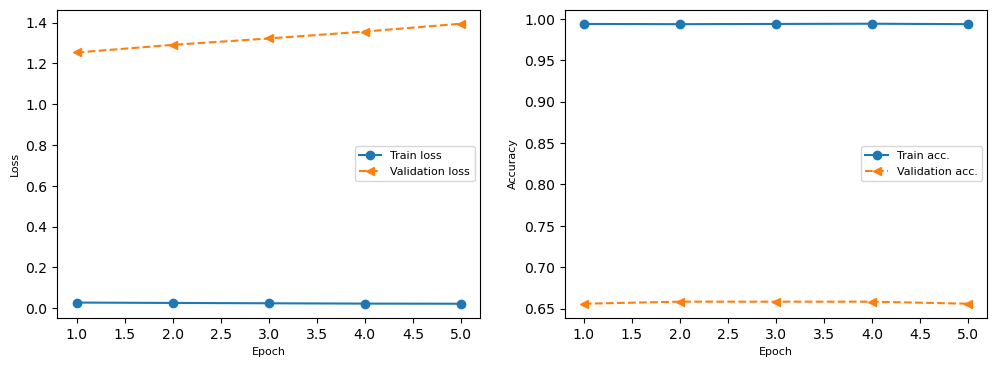

In [14]:
hist = history.history
x_arr = np.arange(len(hist['loss'])) + 1

fig = plt.figure(figsize=(12, 4))
ax = fig.add_subplot(1, 2, 1)
ax.plot(x_arr, hist['loss'], '-o', label='Train loss')
ax.plot(x_arr, hist['val_loss'], '--<', label='Validation loss')
ax.legend(fontsize=8)
ax.set_xlabel('Epoch', size=8)
ax.set_ylabel('Loss', size=8)

ax = fig.add_subplot(1, 2, 2)
ax.plot(x_arr, hist['accuracy'], '-o', label='Train acc.')
ax.plot(x_arr, hist['val_accuracy'], '--<', label='Validation acc.')
ax.legend(fontsize=8)
ax.set_xlabel('Epoch', size=8)
ax.set_ylabel('Accuracy', size=8)
plt.show()